In [6]:
import numpy as np
import pandas as pd
import scanpy as sc
import scrublet as scr
import os
import warnings
import functools
import seaborn as sns
import scipy.stats
import anndata
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

warnings.filterwarnings('ignore')
os.chdir(os.path.expanduser('/home/jovyan/Prostate_analysis/scanpy'))
sc.settings.verbosity = 3
sc.logging.print_versions()

results_file = 'out/prostate.h5ad'

adata = sc.read_h5ad(results_file)

scanpy==1.4.5.post2 anndata==0.6.22.post1 umap==0.3.10 numpy==1.17.2 scipy==1.4.1 pandas==0.25.1 scikit-learn==0.22.1 statsmodels==0.11.0rc1 python-igraph==0.7.1 louvain==0.6.1


In [7]:
# subset to mnp
mnp = adata[adata.obs['celltype'] == 'MNP']
mnp

View of AnnData object with n_obs × n_vars = 519 × 1487 
    obs: 'age', 'barcode', 'batch', 'group', 'highest_GLEASON_score', 'mri_grading', 'name', 'patient', 'pool', 'psa', 'sample', 'scrublet_score', 'scrublet_cluster_score', 'bh_pval', 'is_doublet', 'n_genes', 'percent_mito', 'n_counts', 'S_score', 'G2M_score', 'phase', 'leiden', 'celltype'
    var: 'gene_ids', 'feature_types', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'celltype_colors', 'dendrogram_leiden', 'group_colors', 'leiden', 'leiden_colors', 'neighbors', 'patient_colors', 'pca', 'phase_colors', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

In [8]:
# make a copy?
adata = sc.AnnData(mnp.raw.X, obs = mnp.obs, var = mnp.raw.var, uns = mnp.uns)
adata.raw = adata

extracting highly variable genes
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


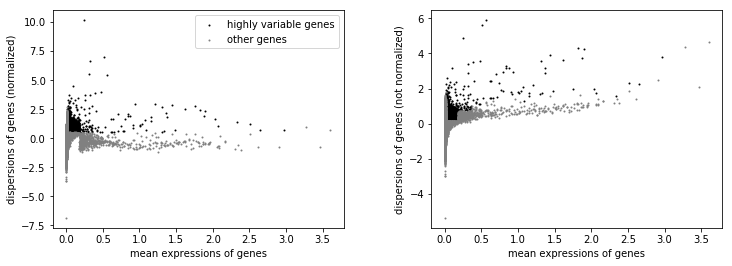

In [9]:
# Identify highly-variable genes.
sc.pp.highly_variable_genes(adata, min_mean = 0.0125, max_mean = 3, min_disp = 0.5)
# plot highly_variable_genes
sc.pl.highly_variable_genes(adata)

In [10]:
# Actually do the filtering.
adata = adata[:, adata.var['highly_variable']]

In [11]:
import multiprocessing
# regress and scale for PCA
sc.pp.regress_out(adata, ['n_counts', 'percent_mito'], n_jobs = multiprocessing.cpu_count()-1)
sc.pp.scale(adata, max_value = 10)
sc.tl.pca(adata, svd_solver = 'arpack', n_comps = 50)

regressing out ['n_counts', 'percent_mito']
    sparse input is densified and may lead to high memory use
    finished (0:00:02)
computing PCA with n_comps = 50
    on highly variable genes
    finished (0:00:00)


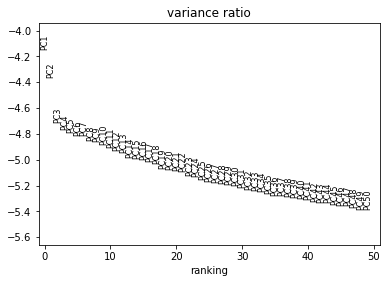

In [12]:
# Principal component analysis
sc.pl.pca_variance_ratio(adata, log = True, n_pcs = 50)

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:01)
running Leiden clustering
    finished: found 7 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


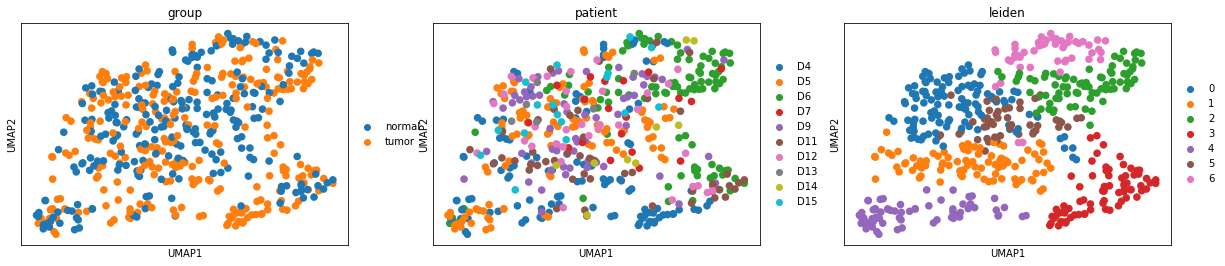

In [13]:
# Computing the neighborhood graph. Seurat uses k = 20 as default
sc.pp.neighbors(adata, n_neighbors = 10, n_pcs = 50)
# run UMAP
sc.tl.umap(adata, n_components = 2, min_dist = 0.3)
# find clusters
sc.tl.leiden(adata)
# plotting groups and clusters
sc.pl.umap(adata, color = ['group', 'patient', 'leiden'])

computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	'distances', weighted adjacency matrix
	'connectivities', weighted adjacency matrix (0:00:01)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:01)
running Leiden clustering
    finished: found 7 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


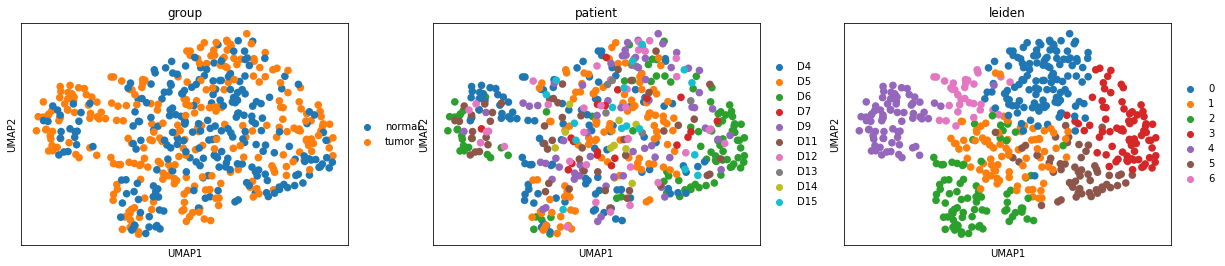

In [14]:
# batch correction using bbknn
sc.external.pp.bbknn(adata, batch_key = 'patient')
# rerun umap
sc.tl.umap(adata, n_components = 2, min_dist = 0.3)
# find clusters
sc.tl.leiden(adata)
sc.pl.umap(adata, color = ['group', 'patient', 'leiden'])

In [28]:
# transfer these slots to a raw object
adata_raw = sc.read_h5ad('out/prostate_raw.h5ad')
adata_raw = adata_raw[adata_raw.obs['celltype'] == 'MNP']
adata_raw.obs = adata.obs
adata_raw.obs['cohort'] = 'UCAM'
adata_raw.obsm = adata.obsm
adata_raw.uns = adata.uns

In [29]:
# save
adata_raw.write('out/mnp.h5ad', compression = 'gzip')

... storing 'cohort' as categorical


In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import scrublet as scr
import os
import warnings
import functools
import seaborn as sns
import scipy.stats
import anndata
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

warnings.filterwarnings('ignore')
os.chdir(os.path.expanduser('/home/jovyan/Prostate_analysis/scanpy'))
sc.settings.verbosity = 3
sc.logging.print_versions()

results_file = 'out/mnp.integrated.h5ad'

adata = sc.read_h5ad(results_file)

/home/jovyan/my-conda-envs/mypython3/lib/python3.7/site-packages/dask/config.py:161: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


scanpy==1.4.5.post2 anndata==0.6.22.post1 umap==0.3.10 numpy==1.17.2 scipy==1.4.1 pandas==0.25.1 scikit-learn==0.22.1 statsmodels==0.11.0rc1 python-igraph==0.7.1 louvain==0.6.1


computing PCA with n_comps = 50
    finished (0:00:01)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:01)
running Leiden clustering
    finished: found 6 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


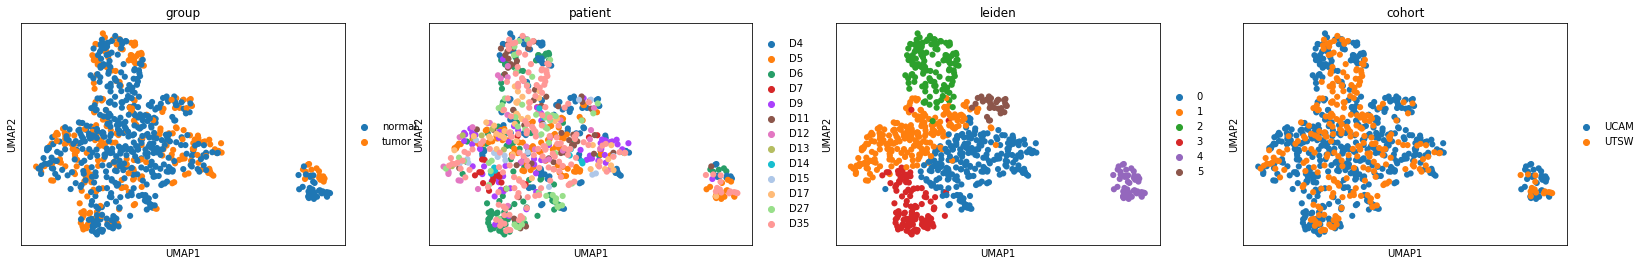

In [130]:
# run PCA
sc.tl.pca(adata, svd_solver = 'arpack')
# Computing the neighborhood graph. Seurat uses k = 20 as default
sc.pp.neighbors(adata, n_neighbors = 10, n_pcs = 50)
# run UMAP
sc.tl.umap(adata, n_components = 2, min_dist = 0.3)
# find clusters
sc.tl.leiden(adata, resolution = 0.5)
# plotting groups and clusters
sc.pl.umap(adata, color = ['group', 'patient', 'leiden', 'cohort'])

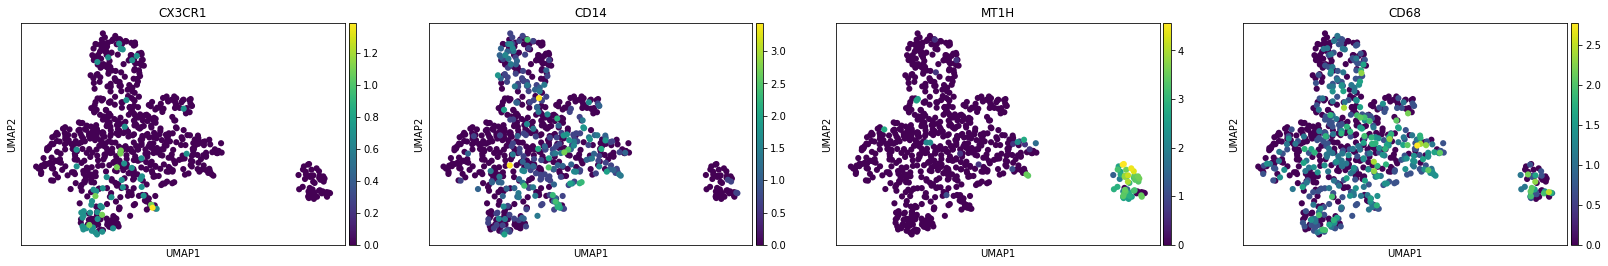

In [150]:
sc.pl.umap(adata, color = ['CX3CR1', 'CD14', 'MT1H', 'CD68'])

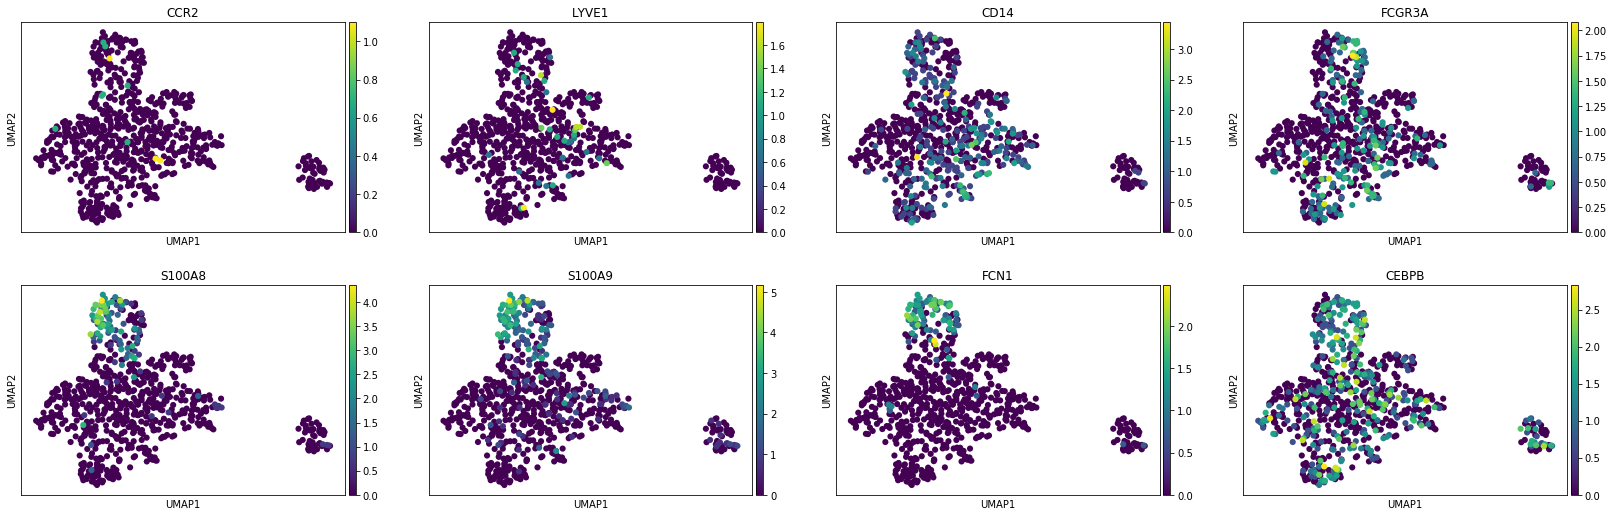

In [151]:
sc.pl.umap(adata, color = ['CCR2', 'LYVE1', 'CD14', 'FCGR3A', 'S100A8', 'S100A9', 'FCN1', 'CEBPB'])

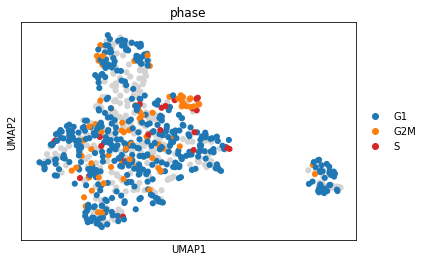

In [166]:
sc.pl.umap(adata, color = ['phase'], groups=['G1', 'G2M','S'], save = '/mnp_phase.pdf')

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


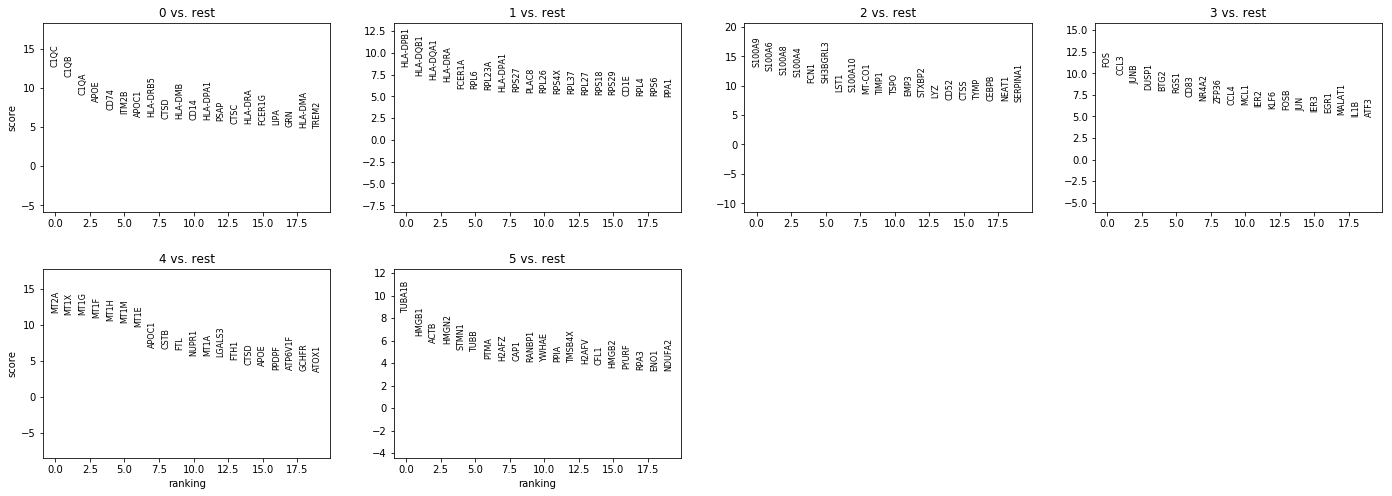

In [92]:
sc.tl.rank_genes_groups(adata, groupby = 'leiden', method = 'wilcoxon', n_genes=30000)
sc.pl.rank_genes_groups(adata, ngenes = 25, sharey = False)

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_leiden']`


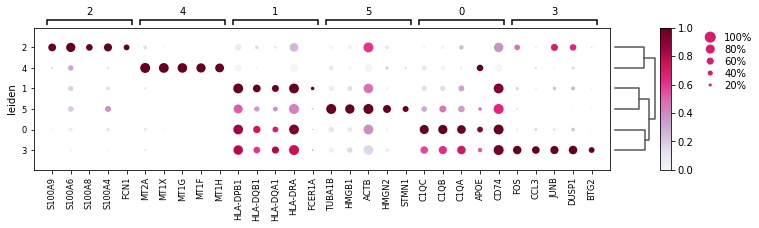

In [93]:
sc.tl.dendrogram(adata, groupby = 'leiden')
sc.pl.rank_genes_groups_dotplot(adata, n_genes = 5, color_map = 'PuRd', standard_scale = 'var', var_group_rotation = 0)

In [135]:
# save
adata.write(results_file, compression = 'gzip')

categories: 0, 1, 2, etc.
var_group_labels: Macrophage, Monocyte/Mac
, Monocyte/Neurophil, etc.


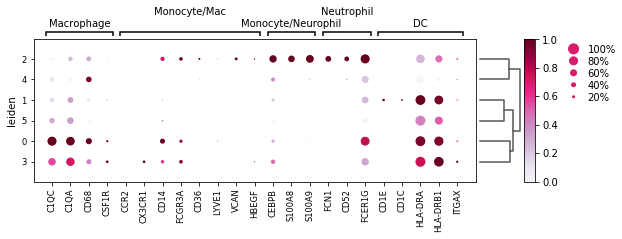

GridSpec(2, 5, height_ratios=[0.5, 10], width_ratios=[8.049999999999999, 0.8, 0.2, 0.5, 0.25])

In [3]:
# plot some marker genes
genes = {
    'Macrophage':['C1QC', 'C1QA', 'CD68', 'CSF1R'],
    'Monocyte/Mac\n':['CCR2', 'CX3CR1', 'CD14', 'FCGR3A', 'CD36', 'LYVE1', 'VCAN', 'HBEGF'],
    'Monocyte/Neurophil':['CEBPB','S100A8', 'S100A9'],
    'Neutrophil\n':['FCN1', 'CD52', 'FCER1G'],
    'DC':['CD1E', 'CD1C','HLA-DRA', 'HLA-`', 'ITGAX']}
sc.pl.dotplot(adata, genes, groupby = 'leiden', color_map = 'PuRd', standard_scale = 'var', dendrogram = True, var_group_rotation = 0)

In [138]:
# # so most likely
# '0':'Mac1'
# '1':'DC'
# '2':'Mono'
# '3':'Mac2'
# '4':'Mac-MT1'
# '5':'Mac-cycling'

In [11]:
import numpy as np
import pandas as pd
import scanpy as sc
import scrublet as scr
import os
import warnings
import functools
import seaborn as sns
import scipy.stats
import anndata
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

warnings.filterwarnings('ignore')
os.chdir(os.path.expanduser('/home/jovyan/Prostate_analysis/scanpy'))
sc.settings.verbosity = 3
sc.logging.print_versions()

results_file = 'out/mnp.integrated.h5ad'

adata = sc.read_h5ad(results_file)
adata

scanpy==1.4.5.post2 anndata==0.6.22.post1 umap==0.3.10 numpy==1.17.2 scipy==1.4.1 pandas==0.25.1 scikit-learn==0.22.1 statsmodels==0.11.0rc1 python-igraph==0.7.1 louvain==0.6.1


AnnData object with n_obs × n_vars = 793 × 3000 
    obs: 'age', 'barcode', 'batch', 'group', 'highest_GLEASON_score', 'mri_grading', 'name', 'patient', 'pool', 'psa', 'sample', 'scrublet_score', 'scrublet_cluster_score', 'bh_pval', 'is_doublet', 'n_genes', 'percent_mito', 'n_counts', 'S_score', 'G2M_score', 'phase', 'leiden', 'celltype', 'cohort', 'nCount_RNA', 'nFeature_RNA', 'nCount_SCT', 'nFeature_SCT', 'celltype-immune'
    var: 'gene_ids', 'feature_types'
    uns: 'celltype-immune_colors', 'cohort_colors', 'dendrogram_celltype-immune', 'dendrogram_leiden', 'group_colors', 'leiden', 'leiden_colors', 'neighbors', 'patient_colors', 'pca', 'phase_colors', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

In [4]:
immune_dict = {'0':'Mac1','1':'DC','2':'Mono','3':'Mac2','4':'Mac-MT1','5':'Mac-cycling'}
adata.obs['celltype-immune'] = [immune_dict[c] for c in adata.obs['leiden']]
adata.obs['celltype-immune'] = adata.obs['celltype-immune'].astype('category')
adata.obs['celltype-immune'].cat.reorder_categories(['Mac1', 'Mac2', 'Mac-MT1', 'Mono', 'DC', 'Mac-cycling'], inplace=True)
if not os.path.exists('figures/umap'):
    os.makedirs('figures/umap')

categories: Mac1, Mac2, Mac-MT1, etc.
var_group_labels: Macrophage, Monocyte/Mac
, Monocyte/Neurophil, etc.


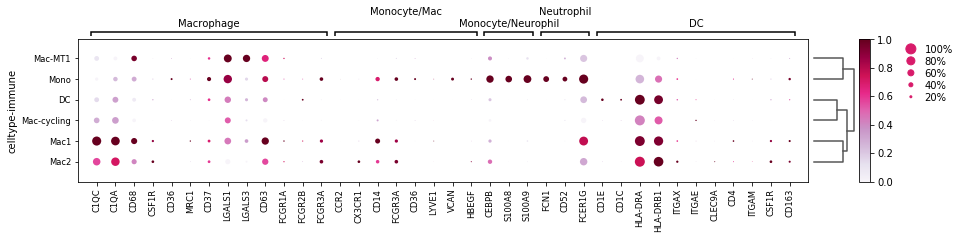

GridSpec(2, 5, height_ratios=[0.5, 10], width_ratios=[13.299999999999999, 0.8, 0.2, 0.5, 0.25])

In [5]:
# plot some marker genes
genes = {
    'Macrophage':['C1QC', 'C1QA', 'CD68', 'CSF1R', 'CD36', 'MRC1', 'CD37', 'LGALS1', 'LGALS3','CD63', 'FCGR1A', 'FCGR2B', 'FCGR3A'],
    'Monocyte/Mac\n':['CCR2', 'CX3CR1', 'CD14', 'FCGR3A', 'CD36', 'LYVE1', 'VCAN', 'HBEGF'],
    'Monocyte/Neurophil':['CEBPB','S100A8', 'S100A9'],
    'Neutrophil\n':['FCN1', 'CD52', 'FCER1G'],
    'DC':['CD1E', 'CD1C','HLA-DRA', 'HLA-DRB1', 'ITGAX', 'ITGAE', 'CLEC9A', 'CD4', 'ITGAM', 'CSF1R', 'CD163']}
sc.pl.dotplot(adata, genes, groupby = 'celltype-immune', color_map = 'PuRd', standard_scale = 'var', dendrogram = True, var_group_rotation = 0)

categories: Mac1, Mac2, Mac-MT1, etc.
var_group_labels: Macrophage


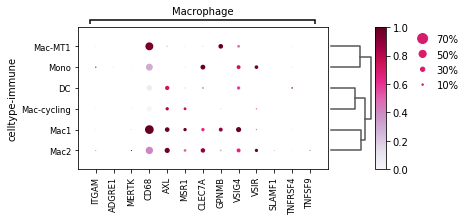

GridSpec(2, 5, height_ratios=[0.5, 10], width_ratios=[4.55, 0.8, 0.2, 0.5, 0.25])

In [6]:
# plot some marker genes
genes = {
    'Macrophage':['ITGAM', 'ADGRE1', 'MERTK', 'CD68', 'AXL', 'MSR1', 'CLEC7A', 'GPNMB', 'VSIG4', 'VSIR', 'SLAMF1', 'TNFRSF4', 'TNFSF9']}
sc.pl.dotplot(adata, genes, groupby = 'celltype-immune', color_map = 'PuRd', standard_scale = 'var', dendrogram = True, var_group_rotation = 0)

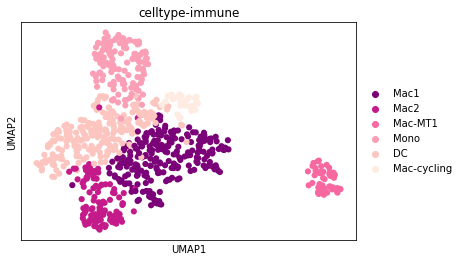

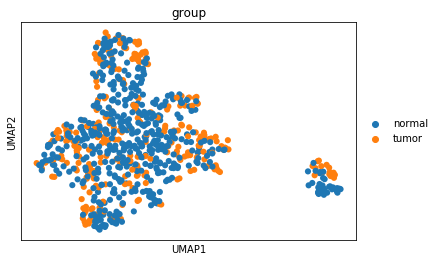

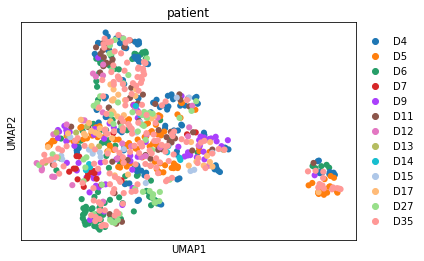

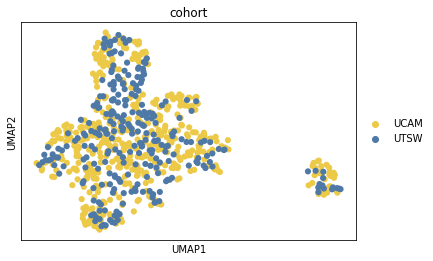

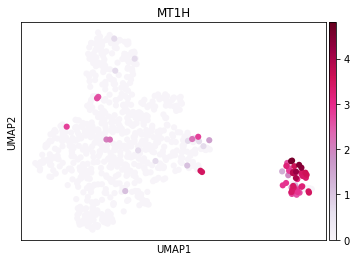

In [7]:
sc.pl.umap(adata, color = ['celltype-immune'], save = '/mnp_celltypes.pdf', palette = ['#7a0177', '#c51b8a', '#f768a1', '#fa9fb5', '#fcc5c0', '#feebe2'])
sc.pl.umap(adata, color = ['group'], save = '/mnp_group.pdf')
sc.pl.umap(adata, color = ['patient'], save = '/mnp_patient.pdf')
sc.pl.umap(adata, color = ['cohort'], save = '/mnp_cohort.pdf', palette = ['#EDC948', '#4E79A7'])
sc.pl.umap(adata, color = ['MT1H'], save = '/mnp_MT1H.pdf', color_map = 'PuRd', vmax = 4.8)

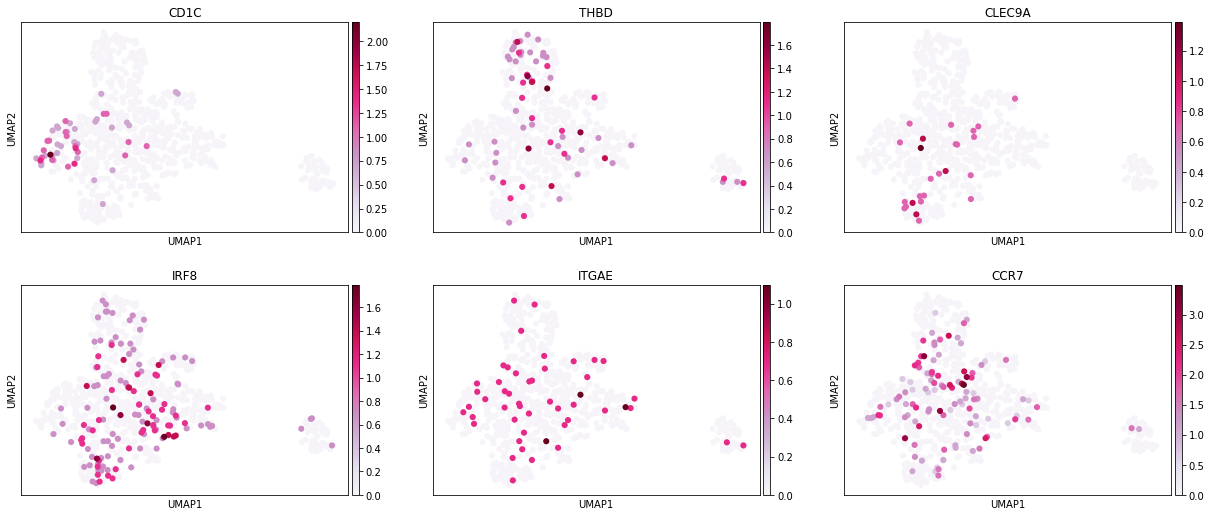

In [8]:
sc.pl.umap(adata, color = ['CD1C', 'THBD', 'CLEC9A', 'IRF8', 'ITGAE', 'CCR7'], color_map = 'PuRd', ncols = 3, save = '/DC_markers.pdf')

In [16]:
sc.tl.rank_genes_groups(adata, groupby = 'celltype-immune', method = 'wilcoxon', n_genes=30000)
# sc.tl.filter_rank_genes_groups(adata, min_in_group_fraction=0.25, min_fold_change=1, max_out_group_fraction=0.5)

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


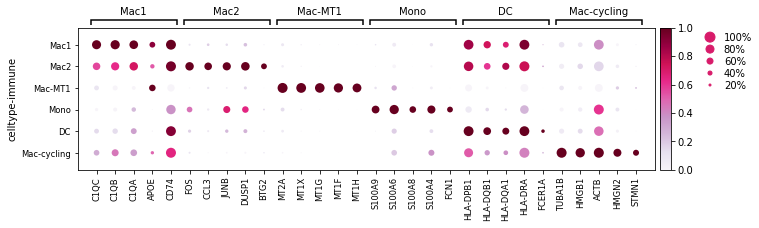

In [19]:
if not os.path.exists('figures/dotplot'):
    os.makedirs('figures/dotplot')
sc.pl.rank_genes_groups_dotplot(adata, 
                                n_genes = 5,
                                # key='rank_genes_groups_filtered',
                                dendrogram = False,
                                color_map = 'PuRd', 
                                standard_scale = 'var', 
                                save = '/mnp_rank_gene_dotplot.pdf',
                                var_group_rotation = 0)

In [11]:
# save this file
adata.write(results_file, compression = 'gzip')

In [144]:
adata.uns['celltype-immune_colors']

array(['#7a0177', '#c51b8a', '#f768a1', '#fa9fb5', '#fcc5c0', '#feebe2'],
      dtype=object)

In [12]:
# do geneset test for the various used signatures
f480_sig = pd.read_csv('dataset/F480_signature.txt', sep = '\t', keep_default_na=False)
macstim_sig = pd.read_csv('dataset/Macrophage_stim_markers_Human.txt', sep = '\t', keep_default_na=False)
phago_sig = pd.read_csv('dataset/PhagocytosisGeneSets.txt', sep = '\t', keep_default_na=False)

In [13]:
for gs in f480_sig:
    sc.tl.score_genes(adata, f480_sig[gs], score_name = str(gs)+'_score', use_raw=True)
for gs in macstim_sig:
    sc.tl.score_genes(adata, macstim_sig[gs], score_name = str(gs)+'_score', use_raw=True)
for gs in phago_sig:
    sc.tl.score_genes(adata, phago_sig[gs], score_name = str(gs)+'_score', use_raw=True)

computing score 'F480hi_score'
    finished: added
    'F480hi_score', score of gene set (adata.obs) (0:00:00)
computing score 'F480lo_score'
    finished: added
    'F480lo_score', score of gene set (adata.obs) (0:00:00)
computing score 'GC_score'
    finished: added
    'GC_score', score of gene set (adata.obs) (0:00:00)
computing score 'HDL_score'
    finished: added
    'HDL_score', score of gene set (adata.obs) (0:00:00)
computing score 'IFNb_score'
    finished: added
    'IFNb_score', score of gene set (adata.obs) (0:00:00)
computing score 'IFNg_score'
    finished: added
    'IFNg_score', score of gene set (adata.obs) (0:00:00)
computing score 'IFNg_TNF_score'
    finished: added
    'IFNg_TNF_score', score of gene set (adata.obs) (0:00:00)
computing score 'IL10_score'
    finished: added
    'IL10_score', score of gene set (adata.obs) (0:00:00)
computing score 'IL13_score'
    finished: added
    'IL13_score', score of gene set (adata.obs) (0:00:00)
computing score 'IL4_score'

computing score 'P3C_PGE2_score'
    finished: added
    'P3C_PGE2_score', score of gene set (adata.obs) (0:00:00)
computing score 'PA_score'
    finished: added
    'PA_score', score of gene set (adata.obs) (0:00:00)
computing score 'PGE2_score'
    finished: added
    'PGE2_score', score of gene set (adata.obs) (0:00:00)
computing score 'SA_score'
    finished: added
    'SA_score', score of gene set (adata.obs) (0:00:00)
computing score 'TNF_score'
    finished: added
    'TNF_score', score of gene set (adata.obs) (0:00:00)
computing score 'TNF_P3C_score'
    finished: added
    'TNF_P3C_score', score of gene set (adata.obs) (0:00:00)
computing score 'TNF_PGE2_score'
    finished: added
    'TNF_PGE2_score', score of gene set (adata.obs) (0:00:00)
computing score 'TPP_score'
    finished: added
    'TPP_score', score of gene set (adata.obs) (0:00:00)
computing score 'TPP_IFNb_score'
    finished: added
    'TPP_IFNb_score', score of gene set (adata.obs) (0:00:00)
computing score 'TP

    finished: added
    'Phagocytosis_score', score of gene set (adata.obs) (0:00:00)
computing score 'Regulation of Phagocytosis_score'
    finished: added
    'Regulation of Phagocytosis_score', score of gene set (adata.obs) (0:00:00)
computing score 'FCGRR Signaling Pathway_score'
    finished: added
    'FCGRR Signaling Pathway_score', score of gene set (adata.obs) (0:00:00)
computing score 'FCGR Mediated Phagocytosis_score'
    finished: added
    'FCGR Mediated Phagocytosis_score', score of gene set (adata.obs) (0:00:00)
computing score 'FCGRIIB Stim Monocyte_score'
    finished: added
    'FCGRIIB Stim Monocyte_score', score of gene set (adata.obs) (0:00:00)
computing score 'FCGRIIB Stim DC_score'
    finished: added
    'FCGRIIB Stim DC_score', score of gene set (adata.obs) (0:00:00)


In [14]:
# from toolz import interleave
# import itertools
# import matplotlib.pyplot as plt

# def plotHeat(adata, groupby, genesets, **kwargs):
#     # calculate average enrichment score
#     list1 = list(set(adata.obs[groupby]))
#     subset = adata.obs[[groupby] + [str(m)+'_score' for m in genesets]]
#     output = pd.DataFrame()
#     for x in list1:
#         subsettmp = subset[subset[groupby] == x]
#         outdict = {}
#         for k in [str(m)+'_score' for m in genesets]:
#             out = {k:np.mean(subsettmp[k])}
#             outdict.update(out)
#         output = output.append(outdict, ignore_index=True)
#     output.index = list1
        
#     output = output.transpose()

#     g = sns.clustermap(output, standard_scale = 0, **kwargs)
#     plt.setp(g.ax_heatmap.get_xticklabels(), rotation=90)
#     return(g)

# def plotHeat_split(adata, groupby, genesets, **kwargs):
#     # calculate average enrichment score
#     list1 = list(set(adata.obs[groupby]))
#     subset = adata.obs[['group', groupby] + [str(m)+'_score' for m in genesets]]
#     outputN = pd.DataFrame()
#     outputT = pd.DataFrame()
#     for x in list1:
#         subsetN = subset[(subset.group == 'normal') & (subset[groupby] == x)]
#         subsetT = subset[(subset.group == 'tumor') & (subset[groupby] == x)]
#         outdictN = {}
#         outdictT = {}
#         for k in [str(m)+'_score' for m in genesets]:
#             outN = {k:np.mean(subsetN[k])}
#             outT = {k:np.mean(subsetT[k])}
#             outdictN.update(outN)
#             outdictT.update(outT)
#         outputN = outputN.append(outdictN, ignore_index=True)
#         outputT = outputT.append(outdictT, ignore_index=True)
#     outputN.index = [l+'_normal' for l in list1]
#     outputT.index = [l+'_tumor' for l in list1]
#     output = pd.concat([outputN, outputT])[list(interleave([outputN, outputT]))]
    
#     col_colors1 = pd.Series(output.index.map(dict(zip([l + '_normal' for l in list1] + [l + '_tumor' for l in list1], list(itertools.chain.from_iterable(itertools.repeat(x, len(list1)) for x in adata.uns['group_colors']))))))
#     col_colors2 = pd.Series(output.index.map(dict(zip([l + '_normal' for l in list1] + [l + '_tumor' for l in list1], list(list(adata.uns['celltype_colors']) + list(adata.uns['celltype_colors']))))))
#     col_colors = pd.concat([col_colors1, col_colors2],axis=1)
#     col_colors.index = [l + '_normal' for l in list1] + [l + '_tumor' for l in list1]
#     col_colors.columns = ['group', grouby]
    
#     output = pd.concat([outputN, outputT])[list(interleave([outputN, outputT]))]
#     output = output.transpose()

#     g = sns.clustermap(output, col_colors = col_colors, standard_scale = 0, **kwargs)
#     plt.setp(g.ax_heatmap.get_xticklabels(), rotation=90)
#     return(g)

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import scrublet as scr
import os
import warnings
import functools
import seaborn as sns
import scipy.stats
import anndata
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

warnings.filterwarnings('ignore')
os.chdir(os.path.expanduser('/home/jovyan/Prostate_analysis/scanpy'))
sc.settings.verbosity = 3
sc.logging.print_versions()

results_file = 'out/mnp.integrated.h5ad'

adata = sc.read_h5ad(results_file)
adata

/home/jovyan/my-conda-envs/mypython3/lib/python3.7/site-packages/dask/config.py:161: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


scanpy==1.4.5.post2 anndata==0.6.22.post1 umap==0.3.10 numpy==1.17.2 scipy==1.4.1 pandas==0.25.1 scikit-learn==0.22.1 statsmodels==0.11.0rc1 python-igraph==0.7.1 louvain==0.6.1


AnnData object with n_obs × n_vars = 793 × 3000 
    obs: 'age', 'barcode', 'batch', 'group', 'highest_GLEASON_score', 'mri_grading', 'name', 'patient', 'pool', 'psa', 'sample', 'scrublet_score', 'scrublet_cluster_score', 'bh_pval', 'is_doublet', 'n_genes', 'percent_mito', 'n_counts', 'S_score', 'G2M_score', 'phase', 'leiden', 'celltype', 'cohort', 'nCount_RNA', 'nFeature_RNA', 'nCount_SCT', 'nFeature_SCT', 'celltype-immune'
    var: 'gene_ids', 'feature_types'
    uns: 'celltype-immune_colors', 'cohort_colors', 'dendrogram_celltype-immune', 'dendrogram_leiden', 'group_colors', 'leiden', 'leiden_colors', 'neighbors', 'patient_colors', 'pca', 'phase_colors', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

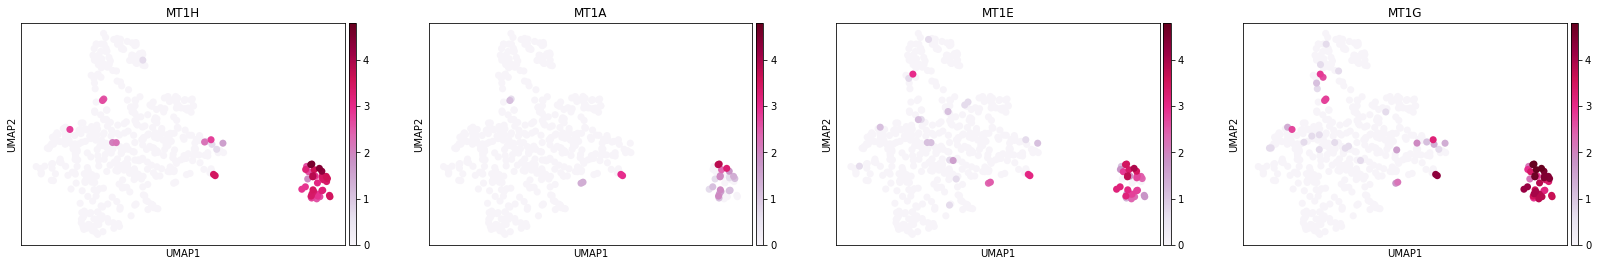

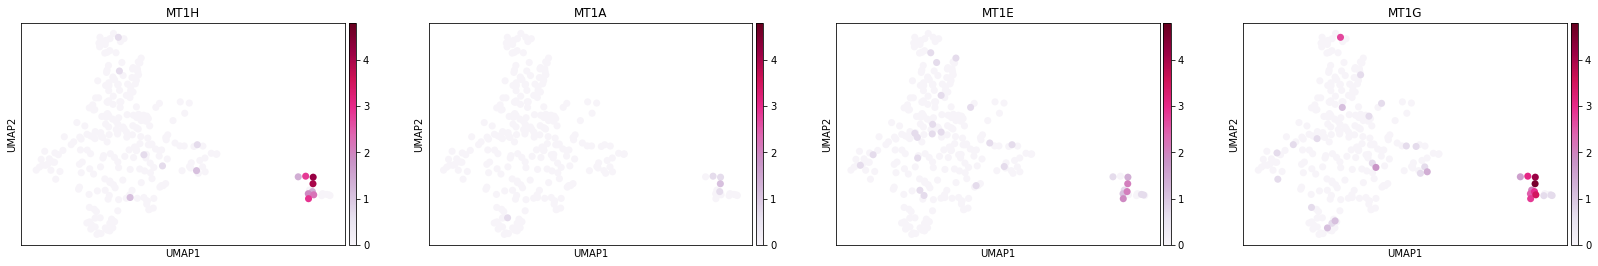

In [4]:
sc.pl.umap(adata[adata.obs['cohort'] == 'UCAM'], color = ['MT1H','MT1A','MT1E','MT1G'], save = '/mnp_ucam_MT1H.pdf', vmax = 4.8, color_map = 'PuRd', size = 200)
sc.pl.umap(adata[adata.obs['cohort'] == 'UTSW'], color = ['MT1H','MT1A','MT1E','MT1G'], save = '/mnp_utsw_MT1H.pdf', vmax = 4.8, color_map = 'PuRd', size = 200)

In [3]:
module = ['MARCH1', 'MARCH8', 'ABCB9', 'ACE', 'ACTR10', 'ACTR1A', 'ACTR1B', 'AP1B1', 'AP1G1', 'AP1M1', 'AP1M2', 'AP1S1', 'AP1S2', 'AP1S3', 'AP2A1', 'AP2A2', 'AP2B1', 'AP2M1', 'AP2S1', 'AP3B1', 'AP3D1', 'ARF1', 'ATG5', 'AZGP1', 'B2M', 'BCAP31', 'CALR', 'CANX', 'CAPZA1', 'CAPZA2', 'CAPZA3', 'CAPZB', 'CCL19', 'CCL21', 'CCR7', 'CD1A', 'CD1B', 'CD1C', 'CD1D', 'CD1E', 'CD207', 'CD209', 'CD36', 'CD68', 'CD74', 'CD8A', 'CENPE', 'CHUK', 'CLEC4A', 'CLEC4M', 'CLTA', 'CLTC', 'CTSD', 'CTSE', 'CTSF', 'CTSH', 'CTSL', 'CTSS', 'CTSV', 'CYBA', 'CYBB', 'DCTN1', 'DCTN2', 'DCTN3', 'DCTN4', 'DCTN5', 'DCTN6', 'DNM2', 'DYNC1H1', 'DYNC1I1', 'DYNC1I2', 'DYNC1LI1', 'DYNC1LI2', 'DYNLL1', 'DYNLL2', 'E7ENX8', 'ERAP1', 'ERAP2', 'FCER1G', 'FCGR1A', 'FCGR1B', 'FCGR2B', 'FCGRT', 'FGL2', 'HFE', 'HLA-A', 'HLA-B', 'HLA-C', 'HLA-DMA', 'HLA-DMB', 'HLA-DOA', 'HLA-DOB', 'HLA-DPA1', 'HLA-DPB1', 'HLA-DQA1', 'HLA-DQA2', 'HLA-DQB1', 'HLA-DQB2', 'HLA-DRA', 'HLA-DRB1', 'HLA-DRB3', 'HLA-DRB4', 'HLA-DRB5', 'HLA-E', 'HLA-F', 'HLA-G', 'HLA-H', 'ICAM1', 'IDE', 'IFI30', 'IKBKB', 'IKBKG', 'ITGAV', 'ITGB5', 'KIF11', 'KIF15', 'KIF18A', 'KIF22', 'KIF23', 'KIF26A', 'KIF2A', 'KIF2B', 'KIF2C', 'KIF3A', 'KIF3B', 'KIF3C', 'KIF4A', 'KIF4B', 'KIF5A', 'KIFAP3', 'KLC1', 'KLC2', 'LAG3', 'LGMN', 'LILRB2', 'LNPEP', 'MICA', 'MICB', 'MR1', 'NCF1', 'NCF2', 'NCF4', 'NOD1', 'NOD2', 'OSBPL1A', 'PDIA3', 'PSAP', 'PSMA1', 'PSMA2', 'PSMA3', 'PSMA4', 'PSMA5', 'PSMA6', 'PSMA7', 'PSMA8', 'PSMB1', 'PSMB10', 'PSMB11', 'PSMB2', 'PSMB3', 'PSMB4', 'PSMB5', 'PSMB6', 'PSMB7', 'PSMB8', 'PSMB9', 'PSMC1', 'PSMC2', 'PSMC3', 'PSMC4', 'PSMC5', 'PSMC6', 'PSMD1', 'PSMD10', 'PSMD11', 'PSMD12', 'PSMD13', 'PSMD14', 'PSMD2', 'PSMD3', 'PSMD4', 'PSMD5', 'PSMD6', 'PSMD7', 'PSMD8', 'PSMD9', 'PSME1', 'PSME2', 'PSME3', 'PSME4', 'PSMF1', 'PYCARD', 'RAB10', 'RAB27A', 'RAB32', 'RAB33A', 'RAB34', 'RAB35', 'RAB3B', 'RAB3C', 'RAB4A', 'RAB5B', 'RAB6A', 'RAB7A', 'RAB8B', 'RACGAP1', 'RELB', 'RFTN1', 'RILP', 'SAR1B', 'SEC13', 'SEC22B', 'SEC23A', 'SEC24A', 'SEC24B', 'SEC24C', 'SEC24D', 'SEC31A', 'SH3GL2', 'SLC11A1', 'SNAP23', 'SPTBN2', 'TAP1', 'TAP2', 'TAPBP', 'TAPBPL', 'THBS1', 'TRAF6', 'TREM2', 'TREX1', 'VAMP3', 'VAMP8', 'WAS', 'YTHDF1']
sc.tl.score_genes(adata, module, score_name = 'Antigen processing and presentation_score', use_raw=True)
ndata = adata[adata.obs['group']=='normal']
tdata = adata[adata.obs['group']=='tumor']

computing score 'Antigen processing and presentation_score'
    finished: added
    'Antigen processing and presentation_score', score of gene set (adata.obs) (0:00:00)


In [4]:
adata.obs['celltype-immune_group'] = [a+'_'+b for a,b in zip(adata.obs['group'], adata.obs['celltype-immune'])]
adata.obs['celltype-immune_group'] = adata.obs['celltype-immune_group'].astype('category')
adata.obs['celltype-immune_group'].cat.reorder_categories(['normal_Mac1', 'tumor_Mac1', 'normal_Mac2', 'tumor_Mac2', 'normal_Mac-MT1', 'tumor_Mac-MT1', 'normal_Mono', 'tumor_Mono', 'normal_DC', 'tumor_DC', 'normal_Mac-cycling', 'tumor_Mac-cycling'], inplace=True)

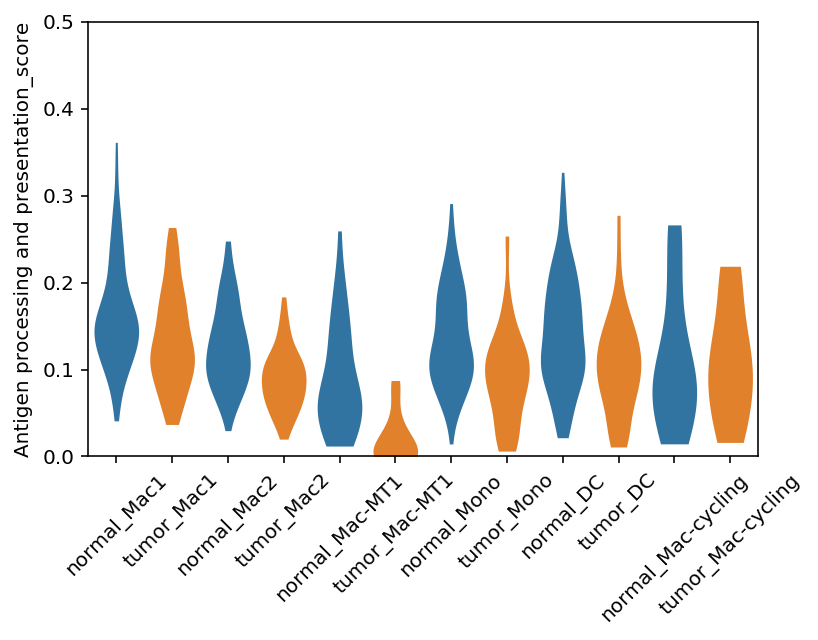

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.ylim(0,.5)
sc.set_figure_params(dpi=80, dpi_save=300, vector_friendly=False, fontsize=9, figsize=(6,1.5))
ax = sns.violinplot()
sc.pl.violin(adata, ['Antigen processing and presentation_score'], ax = ax, groupby = 'celltype-immune_group', size = 0, standard_scale = 'var', palette = adata.uns['group_colors'], linewidth = 0, rotation = 45, save = '/Antigen processing and presentation_score.pdf')

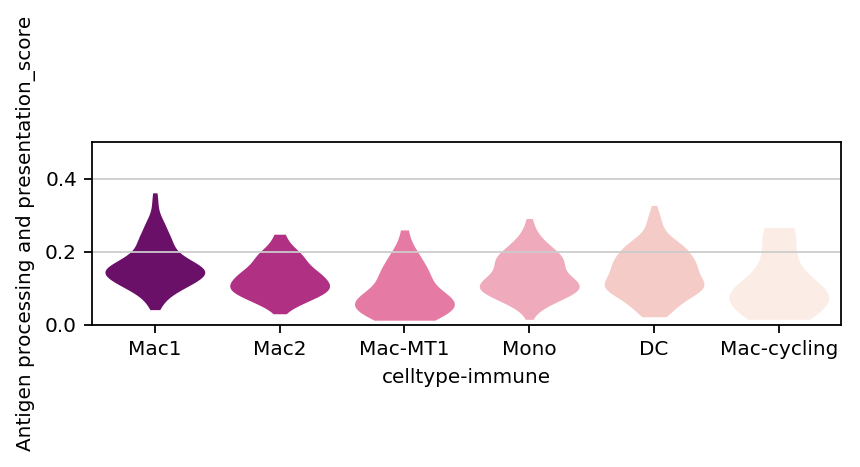

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.ylim(0,.5)
sc.set_figure_params(dpi=80, dpi_save=300, vector_friendly=False, fontsize=9, figsize=(6,1.5))
ax = sns.violinplot()
sc.pl.violin(ndata, ['Antigen processing and presentation_score'], groupby = 'celltype-immune', size = 0, standard_scale = 'var', swap_axes = True, palette = ndata.uns['celltype-immune_colors'], linewidth = 0, ax = ax, save = '/Antigen processing and presentation_score_normal.pdf')

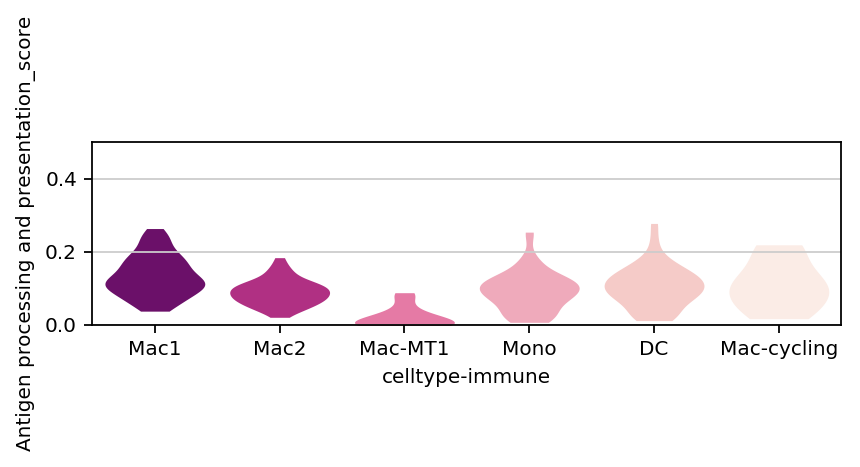

In [7]:
plt.ylim(0,.5)
ax = sns.violinplot()
sc.pl.violin(tdata, ['Antigen processing and presentation_score'], groupby = 'celltype-immune', size = 0, standard_scale = 'var', swap_axes = True, palette = ndata.uns['celltype-immune_colors'], linewidth = 0, ax = ax, save = '/Antigen processing and presentation_score_tumor.pdf')

In [8]:
adata.obs.to_csv('figures/violin/antigenprocessing_score.csv')

In [3]:
import numpy as np
import pandas as pd
import scanpy as sc
import scrublet as scr
import os
import warnings
import functools
import seaborn as sns
import scipy.stats
import anndata
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

warnings.filterwarnings('ignore')
os.chdir(os.path.expanduser('/home/jovyan/Prostate_analysis/scanpy'))
sc.settings.verbosity = 3
sc.logging.print_versions()

results_file = 'out/mnp.integrated.h5ad'

adata = sc.read_h5ad(results_file)
# subset to normal
adata = adata[(adata.obs['group']=='normal') & ~(adata.obs['celltype-immune']=='Mac-cycling')]
adata

scanpy==1.4.5.post2 anndata==0.6.22.post1 umap==0.4.6 numpy==1.19.1 scipy==1.5.2 pandas==1.1.0 scikit-learn==0.23.1 statsmodels==0.11.1 python-igraph==0.8.2 louvain==0.6.1


View of AnnData object with n_obs × n_vars = 492 × 3000 
    obs: 'age', 'barcode', 'batch', 'group', 'highest_GLEASON_score', 'mri_grading', 'name', 'patient', 'pool', 'psa', 'sample', 'scrublet_score', 'scrublet_cluster_score', 'bh_pval', 'is_doublet', 'n_genes', 'percent_mito', 'n_counts', 'S_score', 'G2M_score', 'phase', 'leiden', 'celltype', 'cohort', 'nCount_RNA', 'nFeature_RNA', 'nCount_SCT', 'nFeature_SCT', 'celltype-immune'
    var: 'gene_ids', 'feature_types'
    uns: 'celltype-immune_colors', 'cohort_colors', 'dendrogram_celltype-immune', 'dendrogram_leiden', 'group_colors', 'leiden', 'leiden_colors', 'neighbors', 'patient_colors', 'pca', 'phase_colors', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

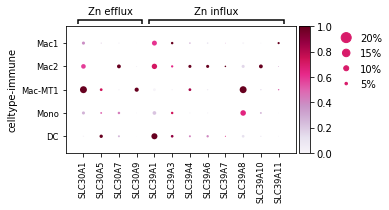

GridSpec(2, 5, height_ratios=[0.5, 10], width_ratios=[4.199999999999999, 0, 0.2, 0.5, 0.25])

In [4]:
Zn_transport = {'Zn efflux':['SLC30A1', 'SLC30A5', 'SLC30A7', 'SLC30A9'], 'Zn influx':['SLC39A1', 'SLC39A3', 'SLC39A4', 'SLC39A6', 'SLC39A7', 'SLC39A8', 'SLC39A10', 'SLC39A11']}
sc.pl.dotplot(adata, Zn_transport, groupby = 'celltype-immune', standard_scale ='var', var_group_rotation = 0, color_map = 'PuRd', save = '/mnp_zntransporterd_dotplot.pdf')

In [2]:
# read in the Gene ontology genesets
GOgenesets = pd.read_csv('dataset/selected_GO_genesets.tsv', sep = '\t')
for g in GOgenesets.columns:
    sc.tl.score_genes(adata, [x for x in GOgenesets[g] if x is not np.nan], score_name = str(g)+'_score', use_raw=True)

computing score 'Antigen Processing And Presentation Of Exogenous Antigen_score'


Trying to set attribute `.obs` of view, making a copy.


    finished: added
    'Antigen Processing And Presentation Of Exogenous Antigen_score', score of gene set (adata.obs) (0:00:00)
computing score 'Interferon-gamma-mediated Signaling Pathway_score'
    finished: added
    'Interferon-gamma-mediated Signaling Pathway_score', score of gene set (adata.obs) (0:00:00)
computing score 'Antigen Processing And Presentation Of Exogenous Peptide Antigen Via MHC Class II_score'
    finished: added
    'Antigen Processing And Presentation Of Exogenous Peptide Antigen Via MHC Class II_score', score of gene set (adata.obs) (0:00:00)
computing score 'Antigen Processing And Presentation Of Peptide Antigen Via MHC Class II_score'
    finished: added
    'Antigen Processing And Presentation Of Peptide Antigen Via MHC Class II_score', score of gene set (adata.obs) (0:00:00)
computing score 'Adaptive Immune Response_score'
    finished: added
    'Adaptive Immune Response_score', score of gene set (adata.obs) (0:00:00)
computing score 'Response To Organop

    finished: added
    'Response To Purine Containing Compound_score', score of gene set (adata.obs) (0:00:00)
computing score 'Negative Regulation Of Viral Transcription_score'
    finished: added
    'Negative Regulation Of Viral Transcription_score', score of gene set (adata.obs) (0:00:00)
computing score 'Detoxification Of Copper Ion_score'
    finished: added
    'Detoxification Of Copper Ion_score', score of gene set (adata.obs) (0:00:00)
computing score 'Stress Response To Copper Ion_score'
    finished: added
    'Stress Response To Copper Ion_score', score of gene set (adata.obs) (0:00:00)
computing score 'Cellular Zinc Ion Homeostasis_score'
    finished: added
    'Cellular Zinc Ion Homeostasis_score', score of gene set (adata.obs) (0:00:00)
computing score 'Neutrophil Degranulation_score'
    finished: added
    'Neutrophil Degranulation_score', score of gene set (adata.obs) (0:00:00)
computing score 'Neutrophil Activation Involved In Immune Response_score'
    finished: a

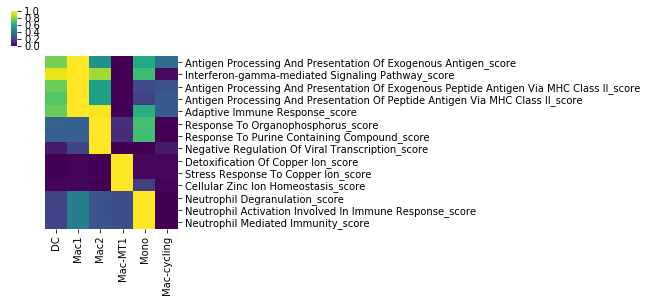

In [8]:
# calculate average enrichment score
list1 = list(set(adata.obs['celltype-immune']))
subset = adata.obs[['celltype-immune'] + [str(gs)+'_score' for gs in GOgenesets.columns]]
output = pd.DataFrame()
for x in list1:
    subsetX = subset[subset['celltype-immune'] == x]
    outdict = {}
    for k in [str(gs)+'_score' for gs in GOgenesets.columns]:
        out = {k:np.mean(subsetX[k])}
        outdict.update(out)
    output = output.append(outdict, ignore_index=True)
output.index = list1
output = output.loc[['DC','Mac1', 'Mac2', 'Mac-MT1', 'Mono', 'Mac-cycling']]
output = output[[str(gs)+'_score' for gs in GOgenesets.columns]]
g = sns.clustermap(output.transpose(), standard_scale = 0, cmap="viridis", figsize=(3, 4), col_cluster = False, row_cluster = False)
if not os.path.exists('figures/heatmap/'):
    os.makedirs('figures/heatmap/')
g.savefig('figures/heatmap/MNP_GOgeneset_score.pdf')

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import scrublet as scr
import os
import warnings
import functools
import seaborn as sns
import scipy.stats
import anndata
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

warnings.filterwarnings('ignore')
os.chdir(os.path.expanduser('/home/jovyan/Prostate_analysis/scanpy'))
sc.settings.verbosity = 3
sc.logging.print_versions()

results_file = 'out/mnp.integrated.h5ad'

adata = sc.read_h5ad(results_file)
mnp_molecules= {
    # 'synapse':["HLA-DRA", "HLA-DRB1"],
    'costimulatory':["ICOSLG", "CD80", "CD86", "CD70", "CD40", "TNFSF9", "CD48", "CD58", "ICAM1", "SLAMF1", "TNFSF14", "TNFRSF14", "NECTIN2"],
    'coinhibitory':["CD48", "LILRB2", "NECTIN2", "CD274", "VSIR", "GPNMB", "LGALS9"]}

adata.obs['celltype-immune_group'] = [a+'_'+b for a,b in zip(adata.obs['group'], adata.obs['celltype-immune'])]
adata.obs['celltype-immune_group'] = adata.obs['celltype-immune_group'].astype('category')
adata.obs['celltype-immune_group'].cat.reorder_categories(['normal_Mac1', 'tumor_Mac1', 'normal_Mac2', 'tumor_Mac2', 'normal_Mac-MT1', 'tumor_Mac-MT1', 'normal_Mono', 'tumor_Mono', 'normal_DC', 'tumor_DC', 'normal_Mac-cycling', 'tumor_Mac-cycling'], inplace=True)

/home/jovyan/my-conda-envs/mypython3/lib/python3.7/site-packages/dask/config.py:161: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


scanpy==1.4.5.post2 anndata==0.6.22.post1 umap==0.3.10 numpy==1.17.2 scipy==1.4.1 pandas==0.25.1 scikit-learn==0.22.1 statsmodels==0.11.0rc1 python-igraph==0.7.1 louvain==0.6.1


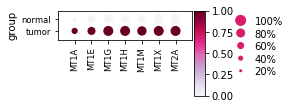

GridSpec(2, 5, height_ratios=[0, 10.5], width_ratios=[2.4499999999999997, 0, 0.2, 0.5, 0.25])

In [22]:
mt_molecules = ['MT1A', 'MT1E', 'MT1G', 'MT1H', 'MT1M', 'MT1X', 'MT2A']
sc.pl.dotplot(adata[adata.obs['celltype-immune'] == 'Mac-MT1'], mt_molecules, groupby = 'group', color_map = 'PuRd', standard_scale = 'var', save = '/mac-mt1_mtx_dotplot.pdf')

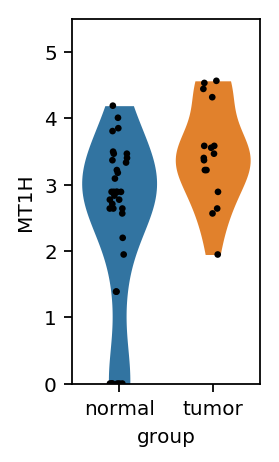

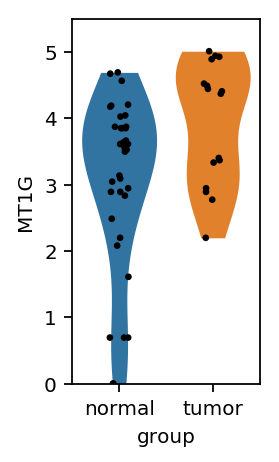

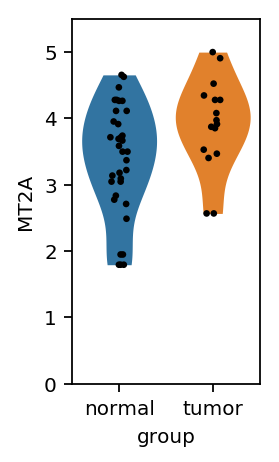

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
sc.set_figure_params(dpi=80, dpi_save=300, vector_friendly=False, fontsize=9, figsize=(1.5,3))
plt.ylim(0,5.5)
ax = sns.violinplot(show = False)
ax.grid(False)
sc.pl.violin(adata[adata.obs['celltype-immune'] == 'Mac-MT1'], ['MT1H'], ax = ax, linewidth = 0, groupby = 'group', standard_scale = 'var', swap_axes = True, size = 3, save = '/mt1h_macmt1_violin.pdf')
plt.ylim(0,5.5)
ax = sns.violinplot(show = False)
ax.grid(False)
sc.pl.violin(adata[adata.obs['celltype-immune'] == 'Mac-MT1'], ['MT1G'], ax = ax, linewidth = 0, groupby = 'group', standard_scale = 'var', swap_axes = True, size = 3, save = '/mt1g_macmt1_violin.pdf')
plt.ylim(0,5.5)
ax = sns.violinplot(show = False)
ax.grid(False)
sc.pl.violin(adata[adata.obs['celltype-immune'] == 'Mac-MT1'], ['MT2A'], ax = ax, linewidth = 0, groupby = 'group', standard_scale = 'var', swap_axes = True, size = 3, save = '/mt2a_macmt1_violin.pdf')

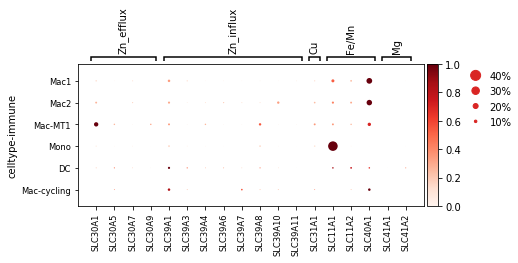

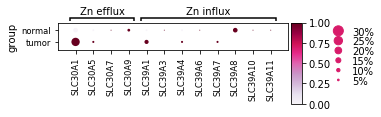

GridSpec(2, 5, height_ratios=[0.5, 10], width_ratios=[4.199999999999999, 0, 0.2, 0.5, 0.25])

In [6]:
metal_ion_transport = {'Zn_efflux':['SLC30A1', 'SLC30A5', 'SLC30A7', 'SLC30A9'], 'Zn_influx':['SLC39A1', 'SLC39A3', 'SLC39A4', 'SLC39A6', 'SLC39A7', 'SLC39A8', 'SLC39A10', 'SLC39A11'], 'Cu':['SLC31A1'], 'Fe/Mn':['SLC11A1','SLC11A2' ,'SLC40A1'],  'Mg':['SLC41A1','SLC41A2']}
Zn_transport = {'Zn efflux':['SLC30A1', 'SLC30A5', 'SLC30A7', 'SLC30A9'], 'Zn influx':['SLC39A1', 'SLC39A3', 'SLC39A4', 'SLC39A6', 'SLC39A7', 'SLC39A8', 'SLC39A10', 'SLC39A11']}
Other_transport = {'Cu':['SLC31A1'], 'Fe/Mn':['SLC11A1','SLC11A2' ,'SLC40A1'], 'Mg':['SLC41A1','SLC41A2']}
sc.pl.dotplot(adata, metal_ion_transport, groupby = 'celltype-immune', standard_scale ='group')
sc.pl.dotplot(adata[adata.obs['celltype-immune'] == 'Mac-MT1'], Zn_transport, groupby = 'group', standard_scale ='var', var_group_rotation = 0, color_map = 'PuRd', save = '/mac-mt1_zntransporterd_dotplot.pdf')

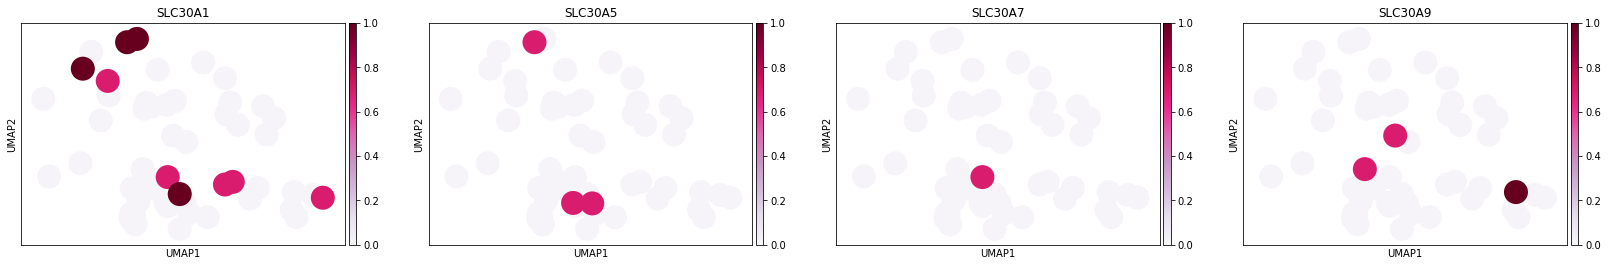

In [5]:
sc.pl.umap(adata[adata.obs['celltype-immune'] == 'Mac-MT1'], color = ['SLC30A1', 'SLC30A5', 'SLC30A7', 'SLC30A9'], vmin = 0, vmax = 1, color_map = 'PuRd')

In [29]:
sc.tl.rank_genes_groups(adata, groupby = 'celltype-immune', method = 't-test', n_genes=30000)

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


In [30]:
def exportDEres(adata, column, filename):
    scores = pd.DataFrame(data = adata.uns['rank_genes_groups']['scores'][column], index = adata.uns['rank_genes_groups']['names'][column])
    lfc = pd.DataFrame(data = adata.uns['rank_genes_groups']['logfoldchanges'][column], index = adata.uns['rank_genes_groups']['names'][column])
    pvals = pd.DataFrame(data = adata.uns['rank_genes_groups']['pvals'][column], index = adata.uns['rank_genes_groups']['names'][column])
    padj = pd.DataFrame(data = adata.uns['rank_genes_groups']['pvals_adj'][column], index = adata.uns['rank_genes_groups']['names'][column])
    dfs = [scores, lfc, pvals, padj]
    df_final = functools.reduce(lambda left,right: pd.merge(left,right,left_index = True, right_index = True), dfs)
    df_final.columns = ['scores', 'logfoldchanges', 'pvals', 'pvals_adj']

    df_final.to_csv(filename, sep = '\t')

outpath='out/DEG/'
for x in list(set(adata.obs['celltype-immune'])):
    exportDEres(adata, str(x), outpath+str(x)+'_marker_genes.txt')

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import scrublet as scr
import os
import warnings
import functools
import seaborn as sns
import scipy.stats
import anndata
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

warnings.filterwarnings('ignore')
os.chdir(os.path.expanduser('/home/jovyan/Prostate_analysis/scanpy'))
sc.settings.verbosity = 3
sc.logging.print_versions()

results_file = 'out/mnp.integrated.h5ad'

adata = sc.read_h5ad(results_file)
adata.obs['celltype-immune_group'] = [a+'_'+b for a,b in zip(adata.obs['group'], adata.obs['celltype-immune'])]
adata.obs['celltype-immune_group'] = adata.obs['celltype-immune_group'].astype('category')
adata.obs['celltype-immune_group'].cat.reorder_categories(['normal_Mac1', 'tumor_Mac1', 'normal_Mac2', 'tumor_Mac2', 'normal_Mac-MT1', 'tumor_Mac-MT1', 'normal_Mono', 'tumor_Mono', 'normal_DC', 'tumor_DC', 'normal_Mac-cycling', 'tumor_Mac-cycling'], inplace=True)

/home/jovyan/my-conda-envs/mypython3/lib/python3.7/site-packages/dask/config.py:161: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


scanpy==1.4.5.post2 anndata==0.6.22.post1 umap==0.3.10 numpy==1.17.2 scipy==1.4.1 pandas==0.25.1 scikit-learn==0.22.1 statsmodels==0.11.0rc1 python-igraph==0.7.1 louvain==0.6.1


computing score 'amp_scores'
    finished: added
    'amp_scores', score of gene set (adata.obs) (0:00:00)


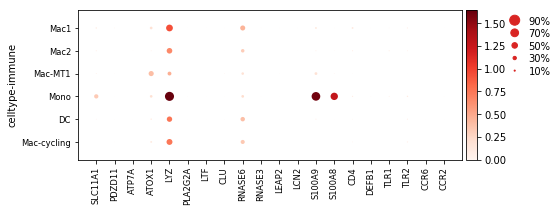

GridSpec(2, 5, height_ratios=[0, 10.5], width_ratios=[7.0, 0, 0.2, 0.5, 0.25])

In [16]:
amp = ["SLC11A1", "PDZD11", "ATP7A", "ATOX1", "GNLY", "ELANE", "PRTN3", "CTSG", "SSA1", "SSA2", "HTN3", "HTN1", "LYZ", "REG3G", "REG3A", "PGLYRP1", "PLA2G2A", "EPPIN", "SEMG1", "LTF", "CLU", "RNASE8", "RNASE6", "RNASE7", "RNASE3", "PGLYRP3", "PGLYRP4", "CAMP", "LEAP2", "BPIFB4", "BPIFB6", "BPIFB2", "BPIFB1", "BPIFA1", "BPIFA2", "DCD", "LCN2", "S100A9", "S100A8", "S100A7A", "S100A7", "CHGA", "PGLYRP2", "ITLN1", "BPI", "PI3", "DEFA4", "DEFA3", "DEFA1", "DEFA5", "CD4", "DEFA6", "PRSS3", "PRSS2", "ART1", "DEFB136", "DEFB129", "DEFB121", "DEFB135", "DEFB125", "DEFB113", "DEFB134", "DEFB128", "DEFB131A", "DEFB119", "DEFB124", "DEFB127", "DEFB123", "DEFB132", "DEFB126", "DEFB104A", "DEFB130A", "DEFB117", "DEFB118", "DEFB116", "DEFB115", "DEFB107A", "DEFB110", "DEFB133", "DEFB130B", "DEFB106A", "DEFB105A", "DEFB114", "DEFB112", "DEFB108B", "DEFB4A", "DEFB103A", "DEFB1", "DEFB108A", "DEFB109B", "TLR1", "TLR2", "CCR6", "CCR2"]
sc.tl.score_genes(adata, amp, score_name = 'amp_scores', use_raw = True)
sc.pl.dotplot(adata, amp2, groupby = 'celltype-immune')

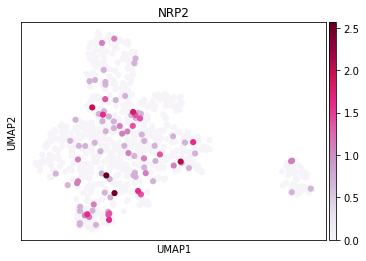

In [2]:
sc.pl.umap(adata, color = 'NRP2', color_map = 'PuRd')

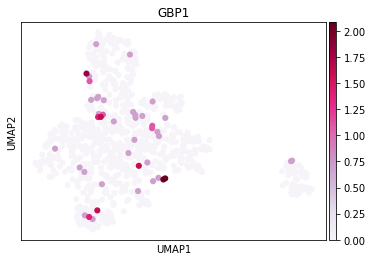

In [3]:
sc.pl.umap(adata, color = 'GBP1', color_map = 'PuRd')

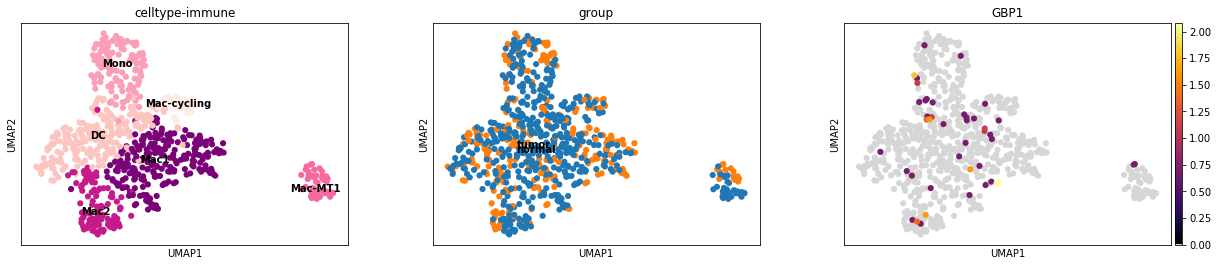

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
viridis = cm.get_cmap('inferno', 256)
newcolors = viridis(np.linspace(0, 1, 256))
grey = np.array([215/256, 215/256, 215/256, 1])
newcolors[:1, :] = grey
newcmp = ListedColormap(newcolors)
sc.pl.umap(adata, color = ['celltype-immune', 'group', 'GBP1'], color_map = newcmp, legend_loc = 'on data')

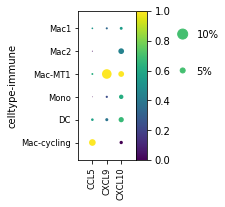

GridSpec(2, 5, height_ratios=[0, 10.5], width_ratios=[1.0499999999999998, 0, 0.2, 0.5, 0.25])

In [19]:
sc.pl.dotplot(adata, ['CCL5', 'CXCL9', 'CXCL10'], groupby = 'celltype-immune', color_map = 'viridis', standard_scale = 'var', save = '/mnp_cxcl9_cxcl10_ccl5_dotplot.pdf', dot_max =.1)

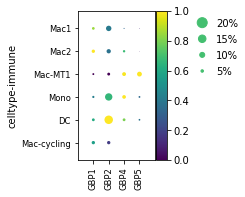

GridSpec(2, 5, height_ratios=[0, 10.5], width_ratios=[1.4, 0, 0.2, 0.5, 0.25])

In [20]:
sc.pl.dotplot(adata, ['GBP1', 'GBP2', 'GBP4', 'GBP5'], groupby = 'celltype-immune', color_map = 'viridis', standard_scale = 'var')

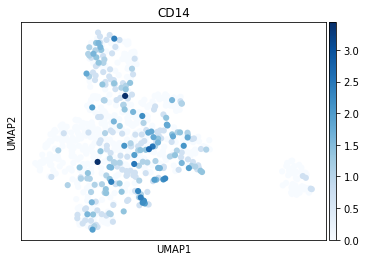

In [25]:
sc.pl.umap(adata, color = ['CD14'], color_map='Blues')

In [12]:
sc.tl.rank_genes_groups(adata, groupby = 'celltype-immune', groups = ['Mac-MT1'] , reference = 'Mac1', method = 'wilcoxon', n_genes=30000)

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


In [13]:
def exportDEres(adata, column, filename):
    scores = pd.DataFrame(data = adata.uns['rank_genes_groups']['scores'][column], index = adata.uns['rank_genes_groups']['names'][column])
    lfc = pd.DataFrame(data = adata.uns['rank_genes_groups']['logfoldchanges'][column], index = adata.uns['rank_genes_groups']['names'][column])
    pvals = pd.DataFrame(data = adata.uns['rank_genes_groups']['pvals'][column], index = adata.uns['rank_genes_groups']['names'][column])
    padj = pd.DataFrame(data = adata.uns['rank_genes_groups']['pvals_adj'][column], index = adata.uns['rank_genes_groups']['names'][column])
    dfs = [scores, lfc, pvals, padj]
    df_final = functools.reduce(lambda left,right: pd.merge(left,right,left_index = True, right_index = True), dfs)
    df_final.columns = ['scores', 'logfoldchanges', 'pvals', 'pvals_adj']

    df_final.to_csv(filename, sep = '\t')

outpath='out/DEG/'
exportDEres(adata, 'Mac-MT1', outpath+'Mac-MT1_all_marker_genes.txt')

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import scrublet as scr
import os
import warnings
import functools
import seaborn as sns
import scipy.stats
import anndata
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

warnings.filterwarnings('ignore')
os.chdir(os.path.expanduser('/home/jovyan/Prostate_analysis/scanpy'))
sc.settings.verbosity = 3
sc.logging.print_versions()

results_file = 'out/mnp.integrated.h5ad'

adata = sc.read_h5ad(results_file)
adata

/home/jovyan/my-conda-envs/mypython3/lib/python3.7/site-packages/dask/config.py:161: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


scanpy==1.4.5.post2 anndata==0.6.22.post1 umap==0.3.10 numpy==1.17.2 scipy==1.4.1 pandas==0.25.1 scikit-learn==0.22.1 statsmodels==0.11.0rc1 python-igraph==0.7.1 louvain==0.6.1


AnnData object with n_obs × n_vars = 793 × 3000 
    obs: 'age', 'barcode', 'batch', 'group', 'highest_GLEASON_score', 'mri_grading', 'name', 'patient', 'pool', 'psa', 'sample', 'scrublet_score', 'scrublet_cluster_score', 'bh_pval', 'is_doublet', 'n_genes', 'percent_mito', 'n_counts', 'S_score', 'G2M_score', 'phase', 'leiden', 'celltype', 'cohort', 'nCount_RNA', 'nFeature_RNA', 'nCount_SCT', 'nFeature_SCT', 'celltype-immune'
    var: 'gene_ids', 'feature_types'
    uns: 'celltype-immune_colors', 'cohort_colors', 'dendrogram_celltype-immune', 'dendrogram_leiden', 'group_colors', 'leiden', 'leiden_colors', 'neighbors', 'patient_colors', 'pca', 'phase_colors', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

In [2]:
# genesets = {'HSPC':['EPX', 'TPSB2', 'PRG2', 'CLC', 'MTRNR2L2', 'DEFA4', 'PRTN3', 'ELANE', 'AZU1', 'CD74', 'TPSAB1', 'HLA-DRA', 'MIR7641-2', 'EOMES', 'XCL1', 'FAM83F', 'PLAC8', 'LSP1', 'PRSS3P2', 'LYZ', 'RNASE3', 'RASD1', 'LOC101243545', 'IGLL1', 'PRSS3', 'SNORD90', 'ALDH1A1', 'SOX4', 'CXCR4', 'MPO', 'XAF1', 'S100A9', 'FOXP2', 'FCGR3B', 'SH2D1A', 'CDK15', 'HEMGN', 'HPGDS', 'TESPA1', 'MALAT1', 'CD70', 'CSTA', 'RNU11', 'B4GALNT4', 'CASP4', 'LOC100506844', 'GLIPR2', 'FOXL1', 'CSH1', 'IER5', 'MNDA', 'ARHGAP15', 'LOC606724', 'MZB1', 'PCDH10', 'KCNE2', 'RETN', 'MIR4426', 'ZNF491', 'ABCB1', 'TNFRSF14', 'LFNG', 'ALB', 'RUNX3', 'ADCYAP1', 'PRSS57', 'HOXA10', 'GSTM1', 'HSPA1B', 'HSPA1A', 'MTRNR2L8', 'PGAP3', 'CPA3', 'FBP1', 'RERE', 'NDRG1', 'CCL4', 'ANKS3', 'SFRP2', 'BACE2', 'ZNF703', 'FPR2', 'ITGA4', 'TLR2', 'PICK1', 'FGL2'],
# 'YSMP':['CD24', 'DHCR24', 'ARPC1A', 'LDHA', 'PGAM1', 'ATP5B', 'EIF5A', 'KPNA2', 'PLVAP', 'PRTG', 'RHOA', 'CALM1', 'CD63', 'S100A10', 'BZW1', 'S100A4', 'KRT18', 'NDUFV3', 'DSC2', 'P4HB', 'CISD1', 'MYDGF', 'F2R', 'GAPDH']}
# genesets = {'HSPC':['PRSS3P2', 'PRSS3', 'SNORD90', 'EPX', 'FOXL1', 'EOMES', 'CD70', 'B4GALNT4', 'HOXA10', 'MTRNR2L2', 'ZNF491', 'LINC00052', 'KCNE2', 'CSH1', 'TPSB2', 'TPSAB1', 'SH2D1A', 'MIR7641-2', 'ABCB1', 'ALDH1A1', 'FOXP2', 'C2CD4B', 'PRSS1', 'PCDH10', 'GBP4', 'FAM78B', 'CD34', 'HOXA6', 'IGLL1', 'TMEM121', 'C1QTNF4', 'EMCN', 'BTBD11', 'IQSEC3', 'LOC101243545', 'PLCH1', 'LCE3D', 'LFNG', 'ABLIM1', 'EEF1G', 'SOX4', 'SIGLEC17P', 'MAFG-AS1', 'EEF1A1', 'ANGPT1', 'HNRNPA1', 'MIR4426', 'FAM229A', 'NPR3', 'AGAP2', 'RASD1', 'F2RL1', 'NKAIN2', 'SPTBN1', 'NRIP1', 'KCNN4', 'MTRNR2L8', 'ALB', 'SPINK2', 'SLC25A6', 'LOC284023', 'RERE', 'PLS1', 'DNAH14', 'CASP4', 'KIAA0125', 'ZNF181', 'NAP1L3', 'CHRM3', 'GNB2L1', 'CPA3', 'EEF1B2', 'FAM43A', 'PICK1', 'SNORD12C', 'ZNF408', 'MLLT3', 'SFRP2', 'LKAAEAR1', 'RSL1D1', 'LOC730101', 'MGC57346', 'CCDC163P', 'PKN2', 'CYTL1', 'SNAI1', 'TAOK3', 'SEPT6', 'IFITM10', 'BTN3A1', 'TSC22D1-AS1', 'PREX2', 'KLHL3', 'BACE2', 'HTRA3', 'ZNF497', 'SORBS3', 'HLF', 'KIAA1147', 'TRH', 'KLHDC1', 'SMIM24', 'SPRED2', 'CRYGD', 'CCDC152', 'HSP90AB1', 'ZNF395', 'SNORD12B', 'CLDN15', 'ZFAS1', 'ADGRG1', 'HBA2', 'HOXA5', 'GRM1', 'MALAT1', 'IL12RB2', 'PGAP3', 'SOSTDC1', 'TXK', 'CD200', 'IL1RL1', 'SORL1', 'ERG', 'SYCE1', 'SRSF12'],
# 'YSMP':['PRTG', 'ECSCR', 'HOXB-AS3', 'LIN28A', 'PLVAP', 'HOPX', 'CD24', 'HOXB6', 'EGFL7', 'GNAI1', 'CALCRL', 'MYCN', 'AFAP1L1', 'FLT4', 'SOX18', 'KDR', 'FCGR2B', 'CCDC173', 'HOXB9', 'S100A16', 'PRDX1', 'CD164', 'CDH5', 'TIE1', 'SCARF1', 'FGD5', 'DHCR24', 'IGFBP2', 'MDK', 'CNN3', 'UCHL1', 'PTPRB', 'PROCR', 'HMGA2', 'SNHG16', 'DNMT3B', 'SOX13', 'RCN1', 'SEPT11', 'FAM69B', 'CCNG1', 'NCR2', 'CPXM1', 'ACE', 'SERPING1', 'LY6E', 'SMYD3', 'COL2A1', 'NPM1', 'ENO1', 'LOXL1-AS1', 'DSC2', 'KRT18', 'HMGA1', 'IMPDH2', 'JAM3', 'SLC7A2', 'VAMP5', 'AIF1L', 'RBPMS', 'PTRF', 'CD109', 'HOXB7', 'CNNM1', 'ARHGAP22', 'MEIS1', 'PYGL', 'BAALC', 'TFPI', 'AADAT', 'BTF3', 'RASGRP3', 'ISYNA1', 'SAMD5', 'LIMCH1', 'AKR1A1', 'HOXB3', 'MMP15', 'ARHGEF6', 'PPFIBP1', 'ENAH', 'ELOVL6', 'MECOM', 'GPC6', 'NME1', 'TPM2', 'FKBP4', 'CDH26', 'GATA3', 'YBX3', 'IQGAP2', 'TMEM123', 'LAMC1', 'NR6A1', 'MYO3B', 'PXDN', 'BCAM', 'RAI14', 'CDCA7', 'SYPL1', 'AHCY', 'NOSTRIN', 'KIT', 'SHANK3', 'NTHL1', 'ARPC1A', 'CD44', 'NT5C3B', 'DCHS1', 'NLN', 'PPM1F', 'CYYR1', 'MFNG', 'IGFBP4', 'CALN1', 'BCAT1', 'EIF3E', 'EBPL', 'KDM5B', 'BEND7', 'LAPTM4A', 'ALDH9A1', 'NAP1L1', 'CERS1', 'RALA', 'DZIP1', 'ABCC1', 'IFITM3', 'GAS5', 'GAPDH', 'LDHA', 'MGST1', 'PRDX4', 'DHX15', 'SOX7', 'KATNB1', 'CBS', 'NCOA7', 'ACOT11', 'SASH1', 'EIF5A', 'DBN1', 'HOXB5', 'TMEM163', 'PCBD1', 'C4orf46', 'ASB9', 'PAICS', 'NOG', 'SCD', 'DARS', 'SPIN1', 'LDOC1', 'LOXL1', 'ETV6', 'SLC20A1', 'SERBP1', 'EFNA1', 'ALDH18A1', 'ACVR2B', 'DNMT3A', 'FBL', 'HSBP1', 'MPDZ', 'SLC29A1', 'VAV3', 'EIF3L', 'SNCG', 'TRANK1', 'RAB3C', 'ANPEP', 'LINC01122', 'AASS', 'EEF2', 'ATP8B4', 'INPP5J', 'RBFOX2', 'MRPS2', 'HSPA9', 'CYB561', 'GALK1', 'HSPD1', 'FSCN1', 'IPO5', 'KCNC4', 'H2AFY2', 'MOCS1', 'PAIP1', 'PODXL', 'WASF1', 'YWHAE', 'LAMB2', 'VNN1', 'PGK1', 'ME3', 'RDX', 'TSPAN3', 'HOXB2', 'ZNF667-AS1', 'ZNF521', 'SUPT4H1', 'PAM', 'CCT3', 'LOX', 'PSMB5', 'CCND2', 'PVR', 'MATR3', 'TWISTNB', 'TRO', 'MTFR1', 'ECI2', 'MMRN2', 'SORD', 'GYPC', 'ITM2B', 'NUDT11', 'MRC2', 'ARID5B', 'NPW', 'PGRMC1', 'FAR2', 'LIN28B', 'AVP', 'TOMM20', 'PPAT', 'IGF1R', 'CCDC102A', 'APBA2', 'SERPINB6', 'CCND1', 'PFKM', 'SH3RF1', 'NIPSNAP1', 'TSPAN18', 'FAT4', 'CLDN10', 'ITGA5', 'LOC100505938', 'TSPAN15', 'BNIP3L', 'AK4', 'MRI1', 'FZD6', 'GALNT14', 'GPRC5B', 'DYM', 'ACACA', 'EIF4B', 'TRAP1', 'BAMBI', 'EXOSC5', 'FSTL1', 'EIF3F', 'FKBP10', 'ERMP1', 'TEX30', 'XXYLT1', 'EPB41L4A-AS1', 'PKP2', 'NETO2', 'HCG18', 'RASAL2', 'RUNX1T1', 'CCT4', 'RGS16', 'CCT8', 'FASN', 'DRAM1', 'RHOBTB3', 'SQLE', 'CAPRIN1', 'NARS2', 'WDR3', 'RNF217', 'TGFBRAP1', 'CACNA2D1', 'TSPAN4', 'PGAP1', 'REXO2', 'ATF6', 'MFGE8', 'COMMD7', 'CYP2S1', 'SRM', 'ZNF704', 'CCNB1IP1', 'STK25', 'QPRT', 'RAMP2', 'MEX3B', 'THEM6', 'KCNK17', 'DUSP10', 'CHN1', 'CDK4', 'LUZP1', 'PA2G4', 'MRPS26', 'KLHL13', 'MRFAP1', 'BCL6B', 'CCT2', 'ZZZ3', 'BLMH', 'PI4KAP1', 'DANCR', 'SRD5A3', 'C1orf43', 'DCTPP1', 'PRDX6', 'SEMA6A', 'SLC25A36', 'TM4SF1', 'DSG2', 'ITM2A', 'C19orf48', 'EDIL3', 'RUNX1', 'RASIP1', 'SH3D19', 'VDAC1', 'PLTP', 'YDJC', 'MSMO1', 'PRR5L', 'GALNT18', 'SLC16A1', 'MYO7A', 'DOK4', 'AVEN', 'CPSF3', 'TMED3', 'NOLC1', 'ARL9', 'TMEM150A', 'SET', 'GSDMD', 'KDELC1', 'NPDC1', 'SLC1A5', 'SPTAN1', 'CEP68', 'FADS1', 'SEPP1', 'TCEAL4', 'SF3B6', 'PTCD2', 'INSIG1', 'ATP6V0E2', 'NEK3', 'TP53', 'TUFM', 'EHD2', 'SNHG17', 'PHACTR2', 'ATP8A2', 'NHP2L1', 'KIAA1549', 'BICD1', 'H1F0', 'POLD2', 'ID1', 'DDB1', 'DDAH1', 'CCDC86', 'G3BP1', 'TMEM25', 'ICA1', 'GCSH', 'NCOA4', 'MCF2L', 'ECE2', 'RPARP-AS1', 'ABRACL', 'DOCK1', 'TMEM97', 'SFXN4', 'PFAS', 'SPOCK2', 'SLC45A3', 'SLC22A16', 'LONRF1', 'KARS', 'ZNF883', 'COL6A2', 'KDM1A', 'ARHGEF3', 'MCM3', 'KNOP1', 'CMSS1', 'PFKP', 'GPA33', 'MATK', 'ZNRF1', 'AK3', 'DHX33', 'NOP56', 'HEPH', 'ZNF503-AS1', 'WSCD1', 'ITGA9', 'PPA1', 'EEF1E1', 'AK2', 'MRPS27', 'PES1', 'TWIST1', 'FAM57A', 'MRPS25', 'ZNF717', 'CACHD1', 'P3H2', 'TMEM69', 'SRP72', 'RAB3B', 'ADAMTS3', 'PTGES2', 'PTMS', 'RRP9', 'SPIN4', 'SPTLC2', 'PAFAH1B2', 'GPN1', 'MPPED2', 'RNF144A', 'TRIP6', 'DPYSL5', 'POLR3D', 'WDR54', 'ALDH2', 'TOMM22', 'MIR4458HG', 'ISCA1', 'LOC101929733', 'GMEB1', 'EIF3I', 'RBM22', 'TEAD4', 'CCT5', 'TIMM9', 'SMARCC1', 'WWC3', 'RBMX', 'SPATA20', 'IARS', 'TPD52L1', 'GTPBP4', 'MYO6', 'MAF1', 'ZNF275', 'TGIF2', 'HMGCS1', 'PAWR', 'DAP', 'BYSL', 'RAB15', 'PLEKHG1', 'RPRD1A', 'HMG20A', 'ARPP19', 'KIAA1257', 'PKM', 'TMEM204', 'ECD', 'LACE1', 'ZNF256']}

# genesets = {'Blood':['CCL13', 'ANKH', 'GCLC', 'DOCK9', 'ABCA1', 'CMKLR1', 'SLC40A1', 'NRP1', 'IGFBP4', 'GPBAR1', 'BRI3', 'MAFB', 'NPL', 'FAM20C', 'ATP1B1', 'CHST15', 'AP2A2', 'SIGLEC14', 'PEPD', 'RGL1', 'PTPRJ', 'GRIN2C', 'PSAP', 'ACVRL1', 'ITGB5', 'SMPDL3A', 'SLC37A2', 'GOLGA4', 'HRH1', 'OAS2', 'EMILIN2', 'PIR', 'SLC7A7', 'FEZ1', 'CD36', 'TIMP2', 'FRMD4B', 'RND3', 'PDK4', 'FXYD6', 'MTSS1', 'SCAMP5', 'FGL1', 'ENG', 'ID1', 'SLC15A3', 'IFI44L', 'PLA2G15', 'GNS', 'ITGAM', 'SDCBP', 'CD109', 'SUSD1', 'MX2', 'LILRA6', 'CARD6', 'RAB3IL1', 'GGTA1P', 'ABCC5', 'TNFRSF21', 'ID2', 'TTYH3', 'RHOU', 'CYSMP1', 'NQO1', 'MITF', 'GAS6', 'FRMD4A', 'PRSS36', 'TMEM51', 'ZNF366', 'AKAP12', 'ENDOD1', 'SRXN1', 'CCDC80', 'SIGLEC11', 'IFIT1', 'XAF1', 'HES1', 'RNF213', 'EPSTI1', 'CLTC', 'CCDC170', 'TRIM47', 'POR', 'MPP1', 'YSMP3', 'KYNU', 'SORBS3', 'CCR1', 'SLC36A1', 'CLDN7', 'VAT1', 'LBH', 'EHD4', 'CYFIP1', 'ADAMTS17', 'CD151', 'SLC9A9', 'IFI44', 'SLC48A1', 'RAP2B', 'CAPRIN2', 'TSPAN4', 'SNX24', 'TRIM58', 'NFIC', 'RRAS', 'IFIH1', 'NEAT1', 'MYLIP', 'TPP1', 'CALML4', 'TMEM2', 'PLEKHA1', 'RXRA', 'ATP6V0C', 'SLC27A3', 'LPCAT1', 'NUCB1', 'MFSD1', 'LGALS9', 'AK1', 'LAMP1', 'SCARB2', 'HEG1', 'ATP6V0D1', 'MVP', 'PTMS', 'FMN1', 'CAPNS1', 'HPSE', 'FARP1', 'STARD8', 'DNM1', 'NAGA', 'MX1', 'OAS3', 'NCOA4', 'SH3PXD2A', 'EEPD1', 'SLFN11', 'PROS1', 'TLN1', 'RTN4', 'FMNL2', 'GRM1', 'LYN', 'BACE2', 'STAT1', 'PPARG', 'DTX3L', 'SLC39A1', 'HOMER3', 'ZNF525', 'NCEH1', 'ABCG1', 'GPR85', 'TAL1', 'RABEP1', 'TMC6', 'PXDC1', 'CEBPB', 'ABCB6', 'ORAI1', 'MYO7A', 'N4BP1', 'CDC42BPB', 'IRF2', 'FAM174B', 'FUCA1', 'SH3TC1', 'IL10RA', 'CNRIP1', 'LRRC4', 'FAM89A', 'ADI1', 'CALU', 'P2RY1', 'AGPAT3', 'EPB41L3', 'APPL2', 'DUSP16', 'ST3GAL1', 'LASP1', 'SLC38A7', 'PI4K2A', 'CD4', 'PARP14', 'CTNNA1', 'RBMS1', 'CITED2', 'M6PR', 'MMD', 'VWCE', 'CPEB2', 'TMEM86A', 'HEXA', 'SCIMP', 'SPATA41', 'DIRC2', 'TLR1', 'DHDH', 'CD276', 'TMEM106A', 'LCP2', 'GIMAP1', 'C3AR1', 'SPIRE1', 'PDGFC', 'PTPRO', 'SYT1', 'FAM89B', 'ARHGAP23', 'DUSP27', 'IFNAR1', 'TP53INP2', 'NAIF1', 'ULK2', 'AMDHD2'],
#  'GMP':['SERPINB10', 'CTSG', 'TARP', 'COL17A1', 'VSTM1', 'MS4A3', 'RGL4', 'RNASE3', 'ANKRD18A', 'CST7', 'AZU1', 'PRTN3', 'P2RY2', 'BPI', 'RAB44', 'AFF2', 'MPO', 'KBTBD11', 'DEFA4', 'SRGN', 'LIN7A', 'CORO2A', 'CYFIP2', 'FUT4', 'BASP1', 'ACTN1', 'RNASE2', 'NUCB2', 'S1PR4', 'PRSS57', 'MLC1', 'CLEC11A', 'SERPINB1', 'TOP1MT', 'LOC100506844', 'S100P', 'LYZ', 'MYB', 'CEACAM4', 'P4HB', 'CEACAM6', 'FAM107B', 'ERLIN1', 'NKG7', 'LYST', 'LRRC75A-AS1', 'SLPI', 'SPARC', 'MARC1', 'TKT', 'GFI1', 'SPNS3', 'MFSD10', 'PLAC8', 'GPI', 'HAL', 'ANXA3', 'SPN', 'CLTCL1', 'CSF3R', 'GPR160', 'CLEC5A', 'RASGRP2', 'ATG16L2', 'RAB27A', 'SLC22A15', 'ELANE', 'FAM46A', 'EPX', 'PNP', 'SLC28A3', 'STOX2', 'NAP1L1', 'CMYA5', 'NDRG1', 'NTSR1', 'PXK', 'SUCO', 'ZFP36L2', 'CCDC81', 'PABPC1', 'PRAM1', 'PROK2', 'KCNK5', 'FAM101B', 'SYTL1', 'NTNG2', 'SSR4', 'MFAP4', 'TSPO', 'LY75', 'BAZ1A', 'ANKRD33B', 'EDEM1', 'MAPK14', 'FXYD5', 'CALR', 'CEBPE', 'LRG1', 'SLC22A16', 'FNDC3B', 'DEFA8P', 'APP', 'PRG2', 'TUBA4A', 'GLTSCR2', 'EMB', 'MBNL1-AS1', 'CFD', 'DACH1', 'CILP2', 'HHLA2', 'LYL1', 'CD24', 'TRERF1', 'FBP1', 'ADRBK1', 'GSDMB', 'NACA', 'SLC22A31', 'COL23A1', 'C1QTNF4', 'SLC2A5', 'FOXP1-AS1', 'KCNE5', 'CEACAM8', 'ZFAS1', 'SRPK1', 'ACTN4', 'SPEF2', 'FAM95C', 'GLT1D1', 'CANX', 'SERPINB8', 'LPO', 'CNTRL', 'GALNT3', 'STK26', 'IGF1R', 'ANP32B', 'PTPN7', 'BZRAP1', 'PGD', 'MLEC', 'ARHGDIB', 'MATN2', 'MIS18BP1', 'SEC31A', 'MEG3', 'NME8', 'HDAC4', 'PTDSS1', 'ABCA13', 'TTC26', 'SMCHD1', 'DEFB1', 'BSPRY', 'LRRFIP1', 'COLGALT2', 'LRP3', 'NUP210', 'CPA3', 'SNTB1', 'IRS2', 'FCAR', 'CNIH4', 'HNRNPH1', 'PRDX5', 'ANKRD36B', 'C12orf57', 'MTL5', 'CLC', 'SVIL', 'TRIQK', 'DDOST', 'SLC36A4', 'TTN', 'MARC2', 'SUMO1P1', 'DGKG', 'EAF2', 'MSRB3', 'DSTYK', 'STXBP5', 'RAB5B', 'AP5B1', 'PTGER2', 'IRF2BP2', 'ANKRD36', 'CCNL2', 'PHACTR3', 'CPNE2', 'SERPINB2', 'BAHCC1', 'HMGB2', 'ARL17A', 'PIP5K1B'],
#  'Monocyte':['HLA-DRA', 'CD74', 'HLA-DPA1', 'HLA-DRB1', 'FGL2', 'PLA2G2A', 'HLA-DMB', 'HLA-DRB5', 'HLA-DMA', 'B2M', 'HLA-DPB1', 'CD1D', 'PTPRC', 'DCN', 'ATP2B1', 'IGFBP3', 'AMICA1', 'POU2F2', 'RNASE6', 'CD48', 'PPP1R14A', 'HLA-DQB1', 'COL3A1', 'TIFAB', 'LUM', 'CLEC7A', 'GIMAP4', 'GNLY', 'MPEG1', 'FAM26F', 'TIMP1', 'RNF130', 'NAAA', 'CTSS', 'SNHG5', 'HCK', 'COL1A1', 'CORO1B', 'SEMA4A', 'CD86', 'AOAH'],
# 'YS-Mac1':['HBE1', 'PLOD2', 'BNIP3', 'STC2', 'GATM', 'EGLN3', 'HBZ', 'LDHA', 'VTRNA1-2', 'S100A1', 'TPI1', 'ALDOA', 'ENO1', 'TMIGD3', 'MMP9', 'GAPDH', 'PGK1', 'SLC2A1', 'CA4', 'DDIT4', 'HSPA7', 'DDIT4L', 'PF4V1', 'ADM', 'F13A1', 'CTSC', 'CD14', 'EGFL7', 'ANGPTL4', 'COL1A2', 'NINJ1', 'SH3BGRL3', 'ADAMTS9', 'PMP22', 'CD99', 'LINC01094', 'COLEC12', 'GSTA4', 'LGALS1', 'KIF17', 'GAPLINC', 'ANG', 'PYGL', 'AP2S1', 'SNX2', 'PGAM1', 'TNNI3', 'HMG20B', 'C4orf3', 'MIR210HG', 'LINC01605', 'BNIP3L', 'ANXA4', 'NRP2', 'PLTP', 'PKM', 'IFITM3', 'IFI27', 'RCN3', 'ALDOC', 'P4HA2', 'CLDN4', 'FCGR2C', 'RAB20', 'AK4', 'PFKFB3', 'SLC2A3', 'AVPI1', 'BCAT1', 'ANXA2', 'NCF2', 'IDH1', 'RASD1', 'VLDLR', 'INSIG2', 'ANKRD37', 'GYPC', 'OSTF1', 'SEMA4B', 'CALM3', 'MTUS1', 'MKNK1', 'MYL12A', 'SEPT10', 'HILPDA', 'EPS15', 'PGM1', 'VEGFA', 'MAPK13', 'CDKN1A', 'RNASET2', 'PTPRN2', 'ITGB2', 'MT1X', 'INF2', 'CALHM2', 'UAP1L1', 'VWA5A', 'LGALS3BP', 'CPVL', 'PPP1R3C', 'NTAN1', 'PIN4P1', 'PRDX4', 'SLC25A24', 'APBB3', 'MT1F', 'ZFP36', 'SNAPIN', 'SASH1', 'GALE', 'WDR54', 'SEC61G', 'KDELR3', 'IRF7', 'SQRDL', 'ITGB4', 'ERO1L', 'GPR84', 'TP53I11', 'DDAH2', 'S100A13', 'ARHGAP18', 'HSPA2', 'SPINK5', 'FAM13A', 'C10orf10', 'SLC16A10', 'RNASE4', 'CCND1', 'ACCS', 'YIPF1', 'SLC25A4', 'METTL7B', 'ISG15', 'AGPAT2', 'RAB13', 'BCKDK', 'MILR1', 'IGLON5', 'IMP3', 'TGIF1', 'PDK1', 'CGA', 'RHOC', 'TSC22D1', 'CACNB1', 'ST5', 'FABP5', 'DPCD', 'LOC100506388', 'EIF4EBP1', 'THBD', 'FGFR1', 'TNS1', 'SLC28A1', 'TIMMDC1', 'PGA5', 'ABLIM3', 'CIART', 'IFNGR2', 'OASL', 'SULT1A1', 'P2RY6', 'SLC11A1', 'CD300A', 'ADGRG1', 'FAM162A', 'RCBTB2', 'GPN3', 'TEX264', 'PLP2', 'SPR', 'TPD52', 'MOB1A', 'TMEM230', 'BST2', 'GUK1', 'SLC22A18', 'FERMT2', 'NUDT14', 'FGF11', 'P2RX4', 'TREX1', 'GALNT18', 'CHST7', 'CAPZA2', 'MOB3C', 'KLHL6-AS1', 'SDHAP3', 'LYPLAL1', 'HPCAL1', 'CMC1', 'CCRL2', 'NDUFB5', 'FGF13', 'DDTL', 'IDH3G'], 
# 'YS-Mac2':['GSTA1', 'FGA', 'FGG', 'DUSP9', 'VTN', 'MT1H', 'SERPINC1', 'APOB', 'RBP4', 'TF', 'FGB', 'APOC3', 'HPX', 'MT1G', 'SERPINA7', 'PCK1', 'FABP1', 'SPINK1', 'OXT', 'AHSG', 'GSTA2', 'TTR', 'APOM', 'F2', 'APOA2', 'APOH', 'AFP', 'PRAP1', 'APOA1', 'GPC3', 'ITIH2', 'SERPINA6', 'MT1M', 'LINC01433', 'SERPINA1', 'MST1', 'ALB', 'MAMDC2', 'TUBB1', 'CUBN', 'CCL25', 'AMOT', 'AGT', 'TBC1D26', 'MRC1', 'WWP1', 'DAB2', 'HIST1H2BE', 'RIN2', 'KCNJ2', 'SPRY4', 'NEK11', 'SCN9A', 'LOC101928008', 'SPRED1', 'CD28', 'TPM1', 'ZNF565', 'STAB1', 'PCDH12', 'HMGA2', 'ZFP62', 'CUEDC1', 'PNLDC1', 'LONRF3', 'TNIK', 'LINC00892', 'AMBP', 'GPAM', 'SEPP1', 'MEF2C', 'MT1E']}

genesets = {
#     'Blood':['CCL13', 'ANKH', 'GCLC', 'DOCK9', 'ABCA1', 'CMKLR1', 'SLC40A1', 'NRP1', 'IGFBP4', 'GPBAR1', 'BRI3', 'MAFB', 'NPL', 'FAM20C', 'ATP1B1', 'CHST15', 'AP2A2', 'SIGLEC14', 'PEPD', 'RGL1', 'PTPRJ', 'GRIN2C', 'PSAP', 'ACVRL1', 'ITGB5', 'SMPDL3A', 'SLC37A2', 'GOLGA4', 'HRH1', 'OAS2', 'EMILIN2', 'PIR', 'SLC7A7', 'FEZ1', 'CD36', 'TIMP2', 'FRMD4B', 'RND3', 'PDK4', 'FXYD6', 'MTSS1', 'SCAMP5', 'FGL1', 'ENG', 'ID1', 'SLC15A3', 'IFI44L', 'PLA2G15', 'GNS', 'ITGAM', 'SDCBP', 'CD109', 'SUSD1', 'MX2', 'LILRA6', 'CARD6', 'RAB3IL1', 'GGTA1P', 'ABCC5', 'TNFRSF21', 'ID2', 'TTYH3', 'RHOU', 'CYSMP1', 'NQO1', 'MITF', 'GAS6', 'FRMD4A', 'PRSS36', 'TMEM51', 'ZNF366', 'AKAP12', 'ENDOD1', 'SRXN1', 'CCDC80', 'SIGLEC11', 'IFIT1', 'XAF1', 'HES1', 'RNF213', 'EPSTI1', 'CLTC', 'CCDC170', 'TRIM47', 'POR', 'MPP1', 'YSMP3', 'KYNU', 'SORBS3', 'CCR1', 'SLC36A1', 'CLDN7', 'VAT1', 'LBH', 'EHD4', 'CYFIP1', 'ADAMTS17', 'CD151', 'SLC9A9', 'IFI44', 'SLC48A1', 'RAP2B', 'CAPRIN2', 'TSPAN4', 'SNX24', 'TRIM58', 'NFIC', 'RRAS', 'IFIH1', 'NEAT1', 'MYLIP', 'TPP1', 'CALML4', 'TMEM2', 'PLEKHA1', 'RXRA', 'ATP6V0C', 'SLC27A3', 'LPCAT1', 'NUCB1', 'MFSD1', 'LGALS9', 'AK1', 'LAMP1', 'SCARB2', 'HEG1', 'ATP6V0D1', 'MVP', 'PTMS', 'FMN1', 'CAPNS1', 'HPSE', 'FARP1', 'STARD8', 'DNM1', 'NAGA', 'MX1', 'OAS3', 'NCOA4', 'SH3PXD2A', 'EEPD1', 'SLFN11', 'PROS1', 'TLN1', 'RTN4', 'FMNL2', 'GRM1', 'LYN', 'BACE2', 'STAT1', 'PPARG', 'DTX3L', 'SLC39A1', 'HOMER3', 'ZNF525', 'NCEH1', 'ABCG1', 'GPR85', 'TAL1', 'RABEP1', 'TMC6', 'PXDC1', 'CEBPB', 'ABCB6', 'ORAI1', 'MYO7A', 'N4BP1', 'CDC42BPB', 'IRF2', 'FAM174B', 'FUCA1', 'SH3TC1', 'IL10RA', 'CNRIP1', 'LRRC4', 'FAM89A', 'ADI1', 'CALU', 'P2RY1', 'AGPAT3', 'EPB41L3', 'APPL2', 'DUSP16', 'ST3GAL1', 'LASP1', 'SLC38A7', 'PI4K2A', 'CD4', 'PARP14', 'CTNNA1', 'RBMS1', 'CITED2', 'M6PR', 'MMD', 'VWCE', 'CPEB2', 'TMEM86A', 'HEXA', 'SCIMP', 'SPATA41', 'DIRC2', 'TLR1', 'DHDH', 'CD276', 'TMEM106A', 'LCP2', 'GIMAP1', 'C3AR1', 'SPIRE1', 'PDGFC', 'PTPRO', 'SYT1', 'FAM89B', 'ARHGAP23', 'DUSP27', 'IFNAR1', 'TP53INP2', 'NAIF1', 'ULK2', 'AMDHD2'],
#     'GMP':['SERPINB10', 'CTSG', 'TARP', 'COL17A1', 'VSTM1', 'MS4A3', 'RGL4', 'RNASE3', 'ANKRD18A', 'CST7', 'AZU1', 'PRTN3', 'P2RY2', 'BPI', 'RAB44', 'AFF2', 'MPO', 'KBTBD11', 'DEFA4', 'SRGN', 'LIN7A', 'CORO2A', 'CYFIP2', 'FUT4', 'BASP1', 'ACTN1', 'RNASE2', 'NUCB2', 'S1PR4', 'PRSS57', 'MLC1', 'CLEC11A', 'SERPINB1', 'TOP1MT', 'LOC100506844', 'S100P', 'LYZ', 'MYB', 'CEACAM4', 'P4HB', 'CEACAM6', 'FAM107B', 'ERLIN1', 'NKG7', 'LYST', 'LRRC75A-AS1', 'SLPI', 'SPARC', 'MARC1', 'TKT', 'GFI1', 'SPNS3', 'MFSD10', 'PLAC8', 'GPI', 'HAL', 'ANXA3', 'SPN', 'CLTCL1', 'CSF3R', 'GPR160', 'CLEC5A', 'RASGRP2', 'ATG16L2', 'RAB27A', 'SLC22A15', 'ELANE', 'FAM46A', 'EPX', 'PNP', 'SLC28A3', 'STOX2', 'NAP1L1', 'CMYA5', 'NDRG1', 'NTSR1', 'PXK', 'SUCO', 'ZFP36L2', 'CCDC81', 'PABPC1', 'PRAM1', 'PROK2', 'KCNK5', 'FAM101B', 'SYTL1', 'NTNG2', 'SSR4', 'MFAP4', 'TSPO', 'LY75', 'BAZ1A', 'ANKRD33B', 'EDEM1', 'MAPK14', 'FXYD5', 'CALR', 'CEBPE', 'LRG1', 'SLC22A16', 'FNDC3B', 'DEFA8P', 'APP', 'PRG2', 'TUBA4A', 'GLTSCR2', 'EMB', 'MBNL1-AS1', 'CFD', 'DACH1', 'CILP2', 'HHLA2', 'LYL1', 'CD24', 'TRERF1', 'FBP1', 'ADRBK1', 'GSDMB', 'NACA', 'SLC22A31', 'COL23A1', 'C1QTNF4', 'SLC2A5', 'FOXP1-AS1', 'KCNE5', 'CEACAM8', 'ZFAS1', 'SRPK1', 'ACTN4', 'SPEF2', 'FAM95C', 'GLT1D1', 'CANX', 'SERPINB8', 'LPO', 'CNTRL', 'GALNT3', 'STK26', 'IGF1R', 'ANP32B', 'PTPN7', 'BZRAP1', 'PGD', 'MLEC', 'ARHGDIB', 'MATN2', 'MIS18BP1', 'SEC31A', 'MEG3', 'NME8', 'HDAC4', 'PTDSS1', 'ABCA13', 'TTC26', 'SMCHD1', 'DEFB1', 'BSPRY', 'LRRFIP1', 'COLGALT2', 'LRP3', 'NUP210', 'CPA3', 'SNTB1', 'IRS2', 'FCAR', 'CNIH4', 'HNRNPH1', 'PRDX5', 'ANKRD36B', 'C12orf57', 'MTL5', 'CLC', 'SVIL', 'TRIQK', 'DDOST', 'SLC36A4', 'TTN', 'MARC2', 'SUMO1P1', 'DGKG', 'EAF2', 'MSRB3', 'DSTYK', 'STXBP5', 'RAB5B', 'AP5B1', 'PTGER2', 'IRF2BP2', 'ANKRD36', 'CCNL2', 'PHACTR3', 'CPNE2', 'SERPINB2', 'BAHCC1', 'HMGB2', 'ARL17A', 'PIP5K1B'],
#     'Monocyte':['HLA-DRA', 'CD74', 'HLA-DPA1', 'HLA-DRB1', 'FGL2', 'PLA2G2A', 'HLA-DMB', 'HLA-DRB5', 'HLA-DMA', 'B2M', 'HLA-DPB1', 'CD1D', 'PTPRC', 'DCN', 'ATP2B1', 'IGFBP3', 'AMICA1', 'POU2F2', 'RNASE6', 'CD48', 'PPP1R14A', 'HLA-DQB1', 'COL3A1', 'TIFAB', 'LUM', 'CLEC7A', 'GIMAP4', 'GNLY', 'MPEG1', 'FAM26F', 'TIMP1', 'RNF130', 'NAAA', 'CTSS', 'SNHG5', 'HCK', 'COL1A1', 'CORO1B', 'SEMA4A', 'CD86', 'AOAH'],
    'YS-Mac1':['HBE1', 'PLOD2', 'BNIP3', 'STC2', 'GATM', 'EGLN3', 'HBZ', 'LDHA', 'VTRNA1-2', 'S100A1', 'TPI1', 'ALDOA', 'ENO1', 'TMIGD3', 'MMP9', 'GAPDH', 'PGK1', 'SLC2A1', 'CA4', 'DDIT4', 'HSPA7', 'DDIT4L', 'PF4V1', 'ADM', 'F13A1', 'CTSC', 'CD14', 'EGFL7', 'ANGPTL4', 'COL1A2', 'NINJ1', 'SH3BGRL3', 'ADAMTS9', 'PMP22', 'CD99', 'LINC01094', 'COLEC12', 'GSTA4', 'LGALS1', 'KIF17', 'GAPLINC', 'ANG', 'PYGL', 'AP2S1', 'SNX2', 'PGAM1', 'TNNI3', 'HMG20B', 'C4orf3', 'MIR210HG', 'LINC01605', 'BNIP3L', 'ANXA4', 'NRP2', 'PLTP', 'PKM', 'IFITM3', 'IFI27', 'RCN3', 'ALDOC', 'P4HA2', 'CLDN4', 'FCGR2C', 'RAB20', 'AK4', 'PFKFB3', 'SLC2A3', 'AVPI1', 'BCAT1', 'ANXA2', 'NCF2', 'IDH1', 'RASD1', 'VLDLR', 'INSIG2', 'ANKRD37', 'GYPC', 'OSTF1', 'SEMA4B', 'CALM3', 'MTUS1', 'MKNK1', 'MYL12A', 'SEPT10', 'HILPDA', 'EPS15', 'PGM1', 'VEGFA', 'MAPK13', 'CDKN1A', 'RNASET2', 'PTPRN2', 'ITGB2', 'MT1X', 'INF2', 'CALHM2', 'UAP1L1', 'VWA5A', 'LGALS3BP', 'CPVL', 'PPP1R3C', 'NTAN1', 'PIN4P1', 'PRDX4', 'SLC25A24', 'APBB3', 'MT1F', 'ZFP36', 'SNAPIN', 'SASH1', 'GALE', 'WDR54', 'SEC61G', 'KDELR3', 'IRF7', 'SQRDL', 'ITGB4', 'ERO1L', 'GPR84', 'TP53I11', 'DDAH2', 'S100A13', 'ARHGAP18', 'HSPA2', 'SPINK5', 'FAM13A', 'C10orf10', 'SLC16A10', 'RNASE4', 'CCND1', 'ACCS', 'YIPF1', 'SLC25A4', 'METTL7B', 'ISG15', 'AGPAT2', 'RAB13', 'BCKDK', 'MILR1', 'IGLON5', 'IMP3', 'TGIF1', 'PDK1', 'CGA', 'RHOC', 'TSC22D1', 'CACNB1', 'ST5', 'FABP5', 'DPCD', 'LOC100506388', 'EIF4EBP1', 'THBD', 'FGFR1', 'TNS1', 'SLC28A1', 'TIMMDC1', 'PGA5', 'ABLIM3', 'CIART', 'IFNGR2', 'OASL', 'SULT1A1', 'P2RY6', 'SLC11A1', 'CD300A', 'ADGRG1', 'FAM162A', 'RCBTB2', 'GPN3', 'TEX264', 'PLP2', 'SPR', 'TPD52', 'MOB1A', 'TMEM230', 'BST2', 'GUK1', 'SLC22A18', 'FERMT2', 'NUDT14', 'FGF11', 'P2RX4', 'TREX1', 'GALNT18', 'CHST7', 'CAPZA2', 'MOB3C', 'KLHL6-AS1', 'SDHAP3', 'LYPLAL1', 'HPCAL1', 'CMC1', 'CCRL2', 'NDUFB5', 'FGF13', 'DDTL', 'IDH3G'], 
    'YS-Mac2':['GSTA1', 'FGA', 'FGG', 'DUSP9', 'VTN', 'MT1H', 'SERPINC1', 'APOB', 'RBP4', 'TF', 'FGB', 'APOC3', 'HPX', 'MT1G', 'SERPINA7', 'PCK1', 'FABP1', 'SPINK1', 'OXT', 'AHSG', 'GSTA2', 'TTR', 'APOM', 'F2', 'APOA2', 'APOH', 'AFP', 'PRAP1', 'APOA1', 'GPC3', 'ITIH2', 'SERPINA6', 'MT1M', 'LINC01433', 'SERPINA1', 'MST1', 'ALB', 'MAMDC2', 'TUBB1', 'CUBN', 'CCL25', 'AMOT', 'AGT', 'TBC1D26', 'MRC1', 'WWP1', 'DAB2', 'HIST1H2BE', 'RIN2', 'KCNJ2', 'SPRY4', 'NEK11', 'SCN9A', 'LOC101928008', 'SPRED1', 'CD28', 'TPM1', 'ZNF565', 'STAB1', 'PCDH12', 'HMGA2', 'ZFP62', 'CUEDC1', 'PNLDC1', 'LONRF3', 'TNIK', 'LINC00892', 'AMBP', 'GPAM', 'SEPP1', 'MEF2C', 'MT1E']}

In [3]:
for x in genesets:
    sc.tl.score_genes(adata, genesets[x], use_raw = True, score_name = x +'_score')

computing score 'YS-Mac1_score'
    finished: added
    'YS-Mac1_score', score of gene set (adata.obs) (0:00:00)
computing score 'YS-Mac2_score'
    finished: added
    'YS-Mac2_score', score of gene set (adata.obs) (0:00:00)


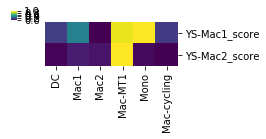

In [5]:
# calculate average enrichment score
list1 = list(set(adata.obs['celltype-immune']))
subset = adata.obs[['celltype-immune'] + [str(gs)+'_score' for gs in genesets]]
output = pd.DataFrame()
for x in list1:
    subsetX = subset[subset['celltype-immune'] == x]
    outdict = {}
    for k in [str(gs)+'_score' for gs in genesets]:
        out = {k:np.mean(subsetX[k])}
        outdict.update(out)
    output = output.append(outdict, ignore_index=True)
output.index = list1
output = output.loc[['DC','Mac1', 'Mac2', 'Mac-MT1', 'Mono', 'Mac-cycling']]
output = output[[str(gs)+'_score' for gs in genesets]]
g = sns.clustermap(output.transpose(), standard_scale = 0, cmap="viridis", figsize=(3, 1), col_cluster = False, row_cluster = False)
if not os.path.exists('figures/heatmap/'):
    os.makedirs('figures/heatmap/')
g.savefig('figures/heatmap/MNP_YSmacgeneset_score.pdf')

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import scrublet as scr
import os
import warnings
import functools
import seaborn as sns
import scipy.stats
import anndata
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

warnings.filterwarnings('ignore')
os.chdir(os.path.expanduser('/home/jovyan/Prostate_analysis/scanpy'))
sc.settings.verbosity = 3
sc.logging.print_versions()

results_file = 'out/mnp.integrated.h5ad'

adata = sc.read_h5ad(results_file)
mnp_molecules= {
    # 'synapse':["HLA-DRA", "HLA-DRB1"],
    'costimulatory':["ICOSLG", "CD80", "CD86", "CD70", "CD40", "TNFSF9", "CD48", "CD58", "ICAM1", "SLAMF1", "TNFSF14", "TNFRSF14", "NECTIN2"],
    'coinhibitory':["CD48", "LILRB2", "NECTIN2", "CD274", "VSIR", "GPNMB", "LGALS9"]}

adata.obs['celltype-immune_group'] = [a+'_'+b for a,b in zip(adata.obs['group'], adata.obs['celltype-immune'])]
adata.obs['celltype-immune_group'] = adata.obs['celltype-immune_group'].astype('category')
adata.obs['celltype-immune_group'].cat.reorder_categories(['normal_Mac1', 'tumor_Mac1', 'normal_Mac2', 'tumor_Mac2', 'normal_Mac-MT1', 'tumor_Mac-MT1', 'normal_Mono', 'tumor_Mono', 'normal_DC', 'tumor_DC', 'normal_Mac-cycling', 'tumor_Mac-cycling'], inplace=True)

/home/jovyan/my-conda-envs/mypython3/lib/python3.7/site-packages/dask/config.py:161: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


scanpy==1.4.5.post2 anndata==0.6.22.post1 umap==0.3.10 numpy==1.17.2 scipy==1.4.1 pandas==0.25.1 scikit-learn==0.22.1 statsmodels==0.11.0rc1 python-igraph==0.7.1 louvain==0.6.1


In [2]:
sc.tl.rank_genes_groups(adata, groupby = 'celltype-immune_group', method = 'wilcoxon', n_genes=30000)

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:01)


In [4]:
def exportDEres(adata, column, filename):
    scores = pd.DataFrame(data = adata.uns['rank_genes_groups']['scores'][column], index = adata.uns['rank_genes_groups']['names'][column])
    lfc = pd.DataFrame(data = adata.uns['rank_genes_groups']['logfoldchanges'][column], index = adata.uns['rank_genes_groups']['names'][column])
    pvals = pd.DataFrame(data = adata.uns['rank_genes_groups']['pvals'][column], index = adata.uns['rank_genes_groups']['names'][column])
    padj = pd.DataFrame(data = adata.uns['rank_genes_groups']['pvals_adj'][column], index = adata.uns['rank_genes_groups']['names'][column])
    dfs = [scores, lfc, pvals, padj]
    df_final = functools.reduce(lambda left,right: pd.merge(left,right,left_index = True, right_index = True), dfs)
    df_final.columns = ['scores', 'logfoldchanges', 'pvals', 'pvals_adj']

    df_final.to_csv(filename, sep = '\t')

outpath='out/DEG/normal_tumor_vs_all/'
if not os.path.exists(outpath):
    os.makedirs(outpath)
for x in list(set(adata.obs['celltype-immune_group'])):
    exportDEres(adata, x, outpath+x+'_marker_genes.txt')

In [6]:
import numpy as np
import pandas as pd
import scanpy as sc
import scrublet as scr
import os
import warnings
import functools
import seaborn as sns
import scipy.stats
import anndata
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

warnings.filterwarnings('ignore')
os.chdir(os.path.expanduser('/home/jovyan/Prostate_analysis/scanpy'))
sc.settings.verbosity = 3
sc.logging.print_versions()

results_file = 'out/mnp.integrated.h5ad'

adata = sc.read_h5ad(results_file)
mnp_molecules= {
    # 'synapse':["HLA-DRA", "HLA-DRB1"],
    'costimulatory':["ICOSLG", "CD80", "CD86", "CD70", "CD40", "TNFSF9", "CD48", "CD58", "ICAM1", "SLAMF1", "TNFSF14", "TNFRSF14", "NECTIN2"],
    'coinhibitory':["CD48", "LILRB2", "NECTIN2", "CD274", "VSIR", "GPNMB", "LGALS9"]}

adata.obs['celltype-immune_group'] = [a+'_'+b for a,b in zip(adata.obs['group'], adata.obs['celltype-immune'])]
adata.obs['celltype-immune_group'] = adata.obs['celltype-immune_group'].astype('category')
adata.obs['celltype-immune_group'].cat.reorder_categories(['normal_Mac1', 'tumor_Mac1', 'normal_Mac2', 'tumor_Mac2', 'normal_Mac-MT1', 'tumor_Mac-MT1', 'normal_Mono', 'tumor_Mono', 'normal_DC', 'tumor_DC', 'normal_Mac-cycling', 'tumor_Mac-cycling'], inplace=True)

scanpy==1.4.5.post2 anndata==0.6.22.post1 umap==0.3.10 numpy==1.17.2 scipy==1.4.1 pandas==0.25.1 scikit-learn==0.22.1 statsmodels==0.11.0rc1 python-igraph==0.7.1 louvain==0.6.1


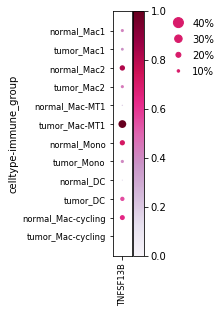

GridSpec(2, 5, height_ratios=[0, 10.5], width_ratios=[0.35, 0, 0.2, 0.5, 0.25])

In [19]:
sc.pl.dotplot(adata, 'TNFSF13B', groupby = 'celltype-immune_group', color_map = 'PuRd', save = '/myeloid_TNFSF13B_dotplot.pdf', standard_scale = 'var')

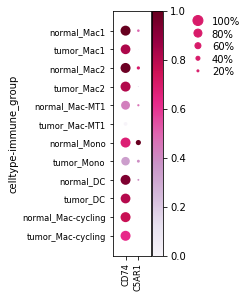

GridSpec(2, 5, height_ratios=[0, 10.5], width_ratios=[0.7, 0, 0.2, 0.5, 0.25])

In [17]:
sc.pl.dotplot(adata, ['CD74', 'C5AR1'], groupby = 'celltype-immune_group', color_map = 'PuRd', save = '/myeloid_CD74_C5AR1_dotplot.pdf', standard_scale = 'var')

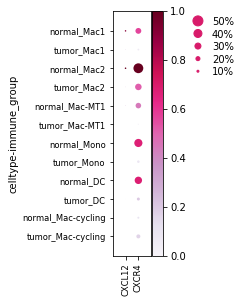

GridSpec(2, 5, height_ratios=[0, 10.5], width_ratios=[0.7, 0, 0.2, 0.5, 0.25])

In [15]:
sc.pl.dotplot(adata, ['CXCL12', 'CXCR4'], groupby = 'celltype-immune_group', color_map = 'PuRd', save = '/myeloid_CXCL12_CXCR4_dotplot.pdf', standard_scale = 'var')

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import scrublet as scr
import os
import warnings
import functools
import seaborn as sns
import scipy.stats
import anndata
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

warnings.filterwarnings('ignore')
os.chdir(os.path.expanduser('/home/jovyan/Prostate_analysis/scanpy'))
sc.settings.verbosity = 3
sc.logging.print_versions()

results_file = 'out/mnp.integrated.h5ad'

adata = sc.read_h5ad(results_file)
mnp_molecules= {
    # 'synapse':["HLA-DRA", "HLA-DRB1"],
    'costimulatory':["ICOSLG", "CD80", "CD86", "CD70", "CD40", "TNFSF9", "CD48", "CD58", "ICAM1", "SLAMF1", "TNFSF14", "TNFRSF14", "NECTIN2"],
    'coinhibitory':["CD48", "LILRB2", "NECTIN2", "CD274", "VSIR", "GPNMB", "LGALS9"]}

adata.obs['celltype-immune_group'] = [a+'_'+b for a,b in zip(adata.obs['group'], adata.obs['celltype-immune'])]
adata.obs['celltype-immune_group'] = adata.obs['celltype-immune_group'].astype('category')
adata.obs['celltype-immune_group'].cat.reorder_categories(['normal_Mac1', 'tumor_Mac1', 'normal_Mac2', 'tumor_Mac2', 'normal_Mac-MT1', 'tumor_Mac-MT1', 'normal_Mono', 'tumor_Mono', 'normal_DC', 'tumor_DC', 'normal_Mac-cycling', 'tumor_Mac-cycling'], inplace=True)

/home/jovyan/my-conda-envs/mypython3/lib/python3.7/site-packages/dask/config.py:161: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


scanpy==1.4.5.post2 anndata==0.6.22.post1 umap==0.3.10 numpy==1.17.2 scipy==1.4.1 pandas==0.25.1 scikit-learn==0.22.1 statsmodels==0.11.0rc1 python-igraph==0.7.1 louvain==0.6.1


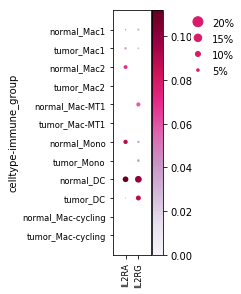

GridSpec(2, 5, height_ratios=[0, 10.5], width_ratios=[0.7, 0, 0.2, 0.5, 0.25])

In [9]:
sc.pl.dotplot(adata, ['IL2RA', 'IL2RG'], groupby = 'celltype-immune_group', color_map = 'PuRd', use_raw = True)

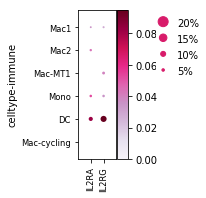

GridSpec(2, 5, height_ratios=[0, 10.5], width_ratios=[0.7, 0, 0.2, 0.5, 0.25])

In [10]:
sc.pl.dotplot(adata, ['IL2RA', 'IL2RG'], groupby = 'celltype-immune', color_map = 'PuRd', use_raw = True)

In [3]:
import numpy as np
import pandas as pd
import scanpy as sc
import scrublet as scr
import os
import warnings
import functools
import seaborn as sns
import scipy.stats
import anndata
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

warnings.filterwarnings('ignore')
os.chdir(os.path.expanduser('/home/jovyan/Prostate_analysis/scanpy'))
sc.settings.verbosity = 3
sc.logging.print_versions()

results_file = 'out/mnp.integrated.h5ad'

adata = sc.read_h5ad(results_file)
mnp_molecules= {
    # 'synapse':["HLA-DRA", "HLA-DRB1"],
    'costimulatory':["ICOSLG", "CD80", "CD86", "CD70", "CD40", "TNFSF9", "CD48", "CD58", "ICAM1", "SLAMF1", "TNFSF14", "TNFRSF14", "NECTIN2"],
    'coinhibitory':["CD48", "LILRB2", "NECTIN2", "CD274", "VSIR", "GPNMB", "LGALS9"]}

adata.obs['celltype-immune_group'] = [a+'_'+b for a,b in zip(adata.obs['group'], adata.obs['celltype-immune'])]
adata.obs['celltype-immune_group'] = adata.obs['celltype-immune_group'].astype('category')
adata.obs['celltype-immune_group'].cat.reorder_categories(['normal_Mac1', 'tumor_Mac1', 'normal_Mac2', 'tumor_Mac2', 'normal_Mac-MT1', 'tumor_Mac-MT1', 'normal_Mono', 'tumor_Mono', 'normal_DC', 'tumor_DC', 'normal_Mac-cycling', 'tumor_Mac-cycling'], inplace=True)
adata = adata[~(adata.obs['celltype-immune']=='Mac-cycling')]

scanpy==1.4.5.post2 anndata==0.6.22.post1 umap==0.4.6 numpy==1.19.1 scipy==1.5.2 pandas==1.1.0 scikit-learn==0.23.1 statsmodels==0.11.1 python-igraph==0.8.2 louvain==0.6.1


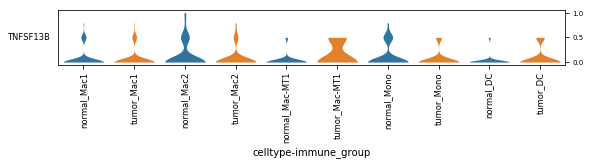

In [5]:
sc.pl.stacked_violin(adata, ['TNFSF13B'], groupby = 'celltype-immune_group', standard_scale = 'var', palette = adata.uns['group_colors'], linewidth = 0, swap_axes = True, figsize = (10,1), save = '/mnp_tumor_vs_normal_baff.pdf')

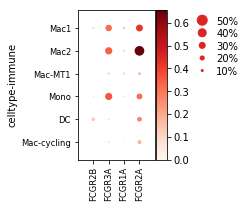

GridSpec(2, 5, height_ratios=[0, 10.5], width_ratios=[1.4, 0, 0.2, 0.5, 0.25])

In [7]:
sc.pl.dotplot(adata, ['FCGR2B', 'FCGR3A', 'FCGR1A', 'FCGR2A'], groupby ='celltype-immune')

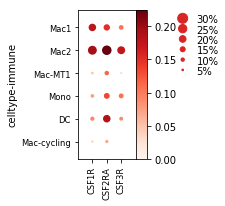

GridSpec(2, 5, height_ratios=[0, 10.5], width_ratios=[1.0499999999999998, 0, 0.2, 0.5, 0.25])

In [3]:
sc.pl.dotplot(adata, ['CSF1R', 'CSF2RA', 'CSF3R'], groupby ='celltype-immune')

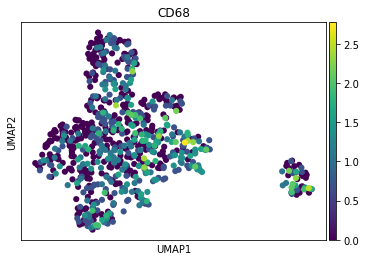

In [9]:
sc.pl.umap(adata, color = ['CD68'])

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import scrublet as scr
import os
import warnings
import functools
import seaborn as sns
import scipy.stats
import anndata
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

warnings.filterwarnings('ignore')
os.chdir(os.path.expanduser('/home/jovyan/Prostate_analysis/scanpy'))
sc.settings.verbosity = 3
sc.logging.print_versions()

results_file = 'out/prostate.h5ad'

adata = sc.read_h5ad(results_file)
adata

scanpy==1.4.5.post2 anndata==0.6.22.post1 umap==0.4.6 numpy==1.19.2 scipy==1.5.3 pandas==0.25.3 scikit-learn==0.23.2 statsmodels==0.12.0 python-igraph==0.8.3 louvain==0.7.0


AnnData object with n_obs × n_vars = 17108 × 1487 
    obs: 'age', 'barcode', 'batch', 'group', 'highest_GLEASON_score', 'mri_grading', 'name', 'patient', 'pool', 'psa', 'sample', 'scrublet_score', 'scrublet_cluster_score', 'bh_pval', 'is_doublet', 'n_genes', 'percent_mito', 'n_counts', 'S_score', 'G2M_score', 'phase', 'leiden', 'celltype', 'Biopsy Location DETAIL', 'Biopsy Location BRIEF', 'Biopsy Location Co-ordinate', 'PMHx', 'celltype-immune'
    var: 'gene_ids', 'feature_types', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'celltype-immune_colors', 'celltype_colors', 'dendrogram_leiden', 'group_colors', 'leiden', 'leiden_colors', 'neighbors', 'patient_colors', 'pca', 'phase_colors', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

In [3]:
mnp = adata[adata.obs['celltype-immune'].isin(['Mac1', 'Mac2', 'Mac-MT1', 'Mono', 'DC'])].copy()
mnp

AnnData object with n_obs × n_vars = 495 × 1487 
    obs: 'age', 'barcode', 'batch', 'group', 'highest_GLEASON_score', 'mri_grading', 'name', 'patient', 'pool', 'psa', 'sample', 'scrublet_score', 'scrublet_cluster_score', 'bh_pval', 'is_doublet', 'n_genes', 'percent_mito', 'n_counts', 'S_score', 'G2M_score', 'phase', 'leiden', 'celltype', 'Biopsy Location DETAIL', 'Biopsy Location BRIEF', 'Biopsy Location Co-ordinate', 'PMHx', 'celltype-immune'
    var: 'gene_ids', 'feature_types', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'celltype-immune_colors', 'celltype_colors', 'dendrogram_leiden', 'group_colors', 'leiden', 'leiden_colors', 'neighbors', 'patient_colors', 'pca', 'phase_colors', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

In [4]:
mnp.obs['celltype-immune_group'] = [c +'_' + g for c,g in zip(mnp.obs['celltype-immune'], mnp.obs['group'])]

In [11]:
'XCR2' in mnp.raw.var.index

False

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
viridis = cm.get_cmap('viridis', 256)
newcolors = viridis(np.linspace(0, 1, 256))
grey = np.array([245/256, 245/256, 245/256, 1])
newcolors[:1, :] = grey
newcmp = ListedColormap(newcolors)

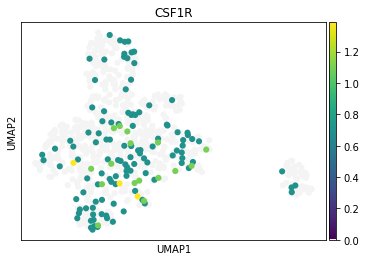

In [9]:
sc.pl.umap(adata, color = ['CSF1R'], color_map = newcmp)

In [5]:
adata.raw.var

,gene_ids,feature_types
index,,
AL669831.5,ENSG00000283040,Gene Expression
LINC00115,ENSG00000225880,Gene Expression
FAM41C,ENSG00000230368,Gene Expression
NOC2L,ENSG00000188976,Gene Expression
HES4,ENSG00000188290,Gene Expression
...,...,...
RP11-156K13.3,NA,Gene Expression
RP11-489O18.1,NA,Gene Expression
RP11-480C22.1,NA,Gene Expression
